Experiments with lstm

In [2]:
from utils.paths import TMP_DIR
from utils.paths import ML_FLOW_DIR
from autoregression.utils_ar import prepare_direct_lstm_data,prepare_recursive_lstm_data, run_direct_lstm_experiment, run_recursive_lstm_experiment
from evaluation import evalresu as er



In [3]:
import joblib
n_past_values=100
n_future_values=20
input_shape=(n_past_values,1)

Data preparation

In [4]:
data = joblib.load(TMP_DIR / 'output1_smoothed_RTS.pkl')

In [5]:

X_train_dir, y_train_dir,X_val_dir,y_val_dir,X_test_dir,y_test_dir = prepare_direct_lstm_data(data,n_past_values,n_future_values)
X_train_rec, y_train_rec,X_val_rec,y_val_rec,X_test_rec,y_test_rec = prepare_recursive_lstm_data(data,n_past_values)

Direct Multioutput Model

In [6]:
from autoregression.models.DirMultiLSTM import build_direct_lstm_model_simple,build_advanced_direct_lstm, build_direct_model_avg

Direct Simple 128 units

Model: "Direct_LSTM_Model_simple"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 100, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_layer (LSTM)               │ (None, 128)            │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 20)             │         2,580 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 69,140 (270.08 KB)

 Trainable params: 69,140 (270.08 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
515/516 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0228 - mae: 0.0800 - mse: 0.0228
Epoch 1: val_loss improved from inf to 0.00304, saving model to models/saved/Direct_LSTM_Model_simple.keras
516/516 ━━━━━━━━━━━━━━━━━━━━ 23s 41ms/step - loss: 0.0228 - mae: 0.0799 - mse: 0.0228 - val_loss: 0.0030 - val_mae: 0.0472 - val_mse: 0.0030 - learning_rate: 0.0010
Epoch 2/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0013 - mae: 0.0283 - mse: 0.0013
Epoch 2: val_loss improved from 0.00304 to 0.00123, saving model to models/saved/Direct_LSTM_Model_simple.keras
516/516 ━━━━━━━━━━━━━━━━━━━━ 21s 40ms/step - loss: 0.0013 - mae: 0.0283 - mse: 0.0013 - val_loss: 0.0012 - val_mae: 0.0281 - val_mse: 0.0012 - learning_rate: 0.0010
Epoch 3/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0012 - mae: 0.0269 - mse: 0.0012
Epoch 3: val_loss did not improve from 0.00123
516/516 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - loss: 0.0012 - mae: 0.0269 - mse: 0.0012 - val_loss: 0.0039 - val_m

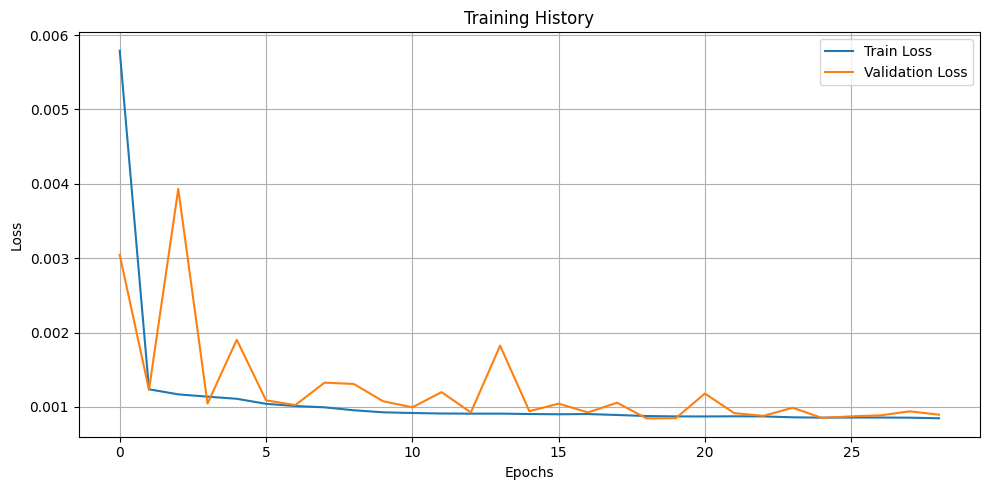

169/169 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step
  Metric       Value
0    MSE    0.000967
1    MAE    0.024419
2   RMSE    0.031092
3     R2    0.614404
4   MAPE    4.413228
5  SMAPE    4.361241
6    SAE  131.494786


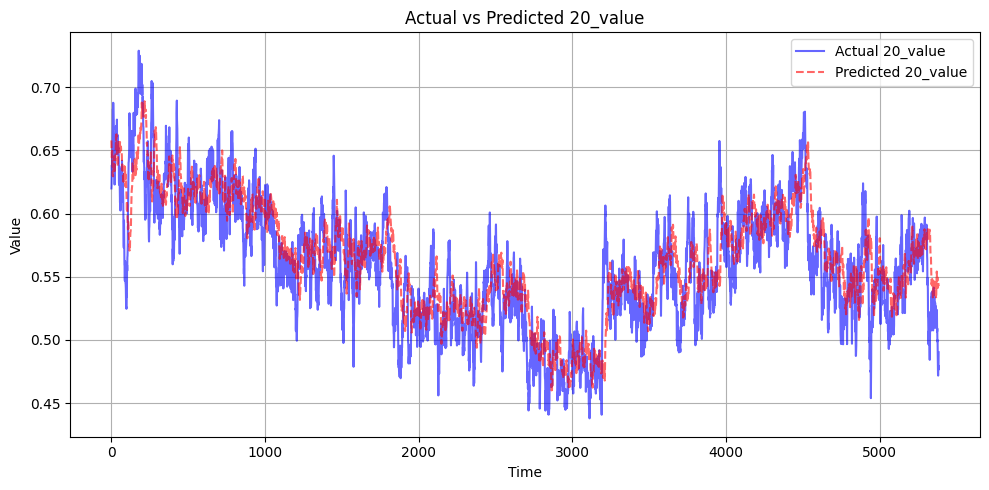

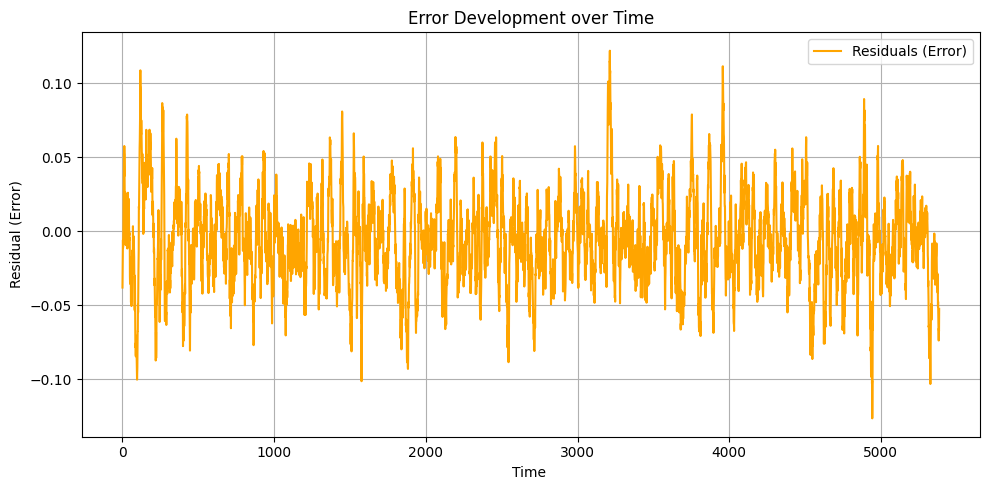

  Metric     Value
0    MSE  0.001596
1    MAE  0.037553
2   RMSE  0.039956
3     R2 -7.775485
4   MAPE  6.081976
5  SMAPE  5.877845
6    SAE  0.751066


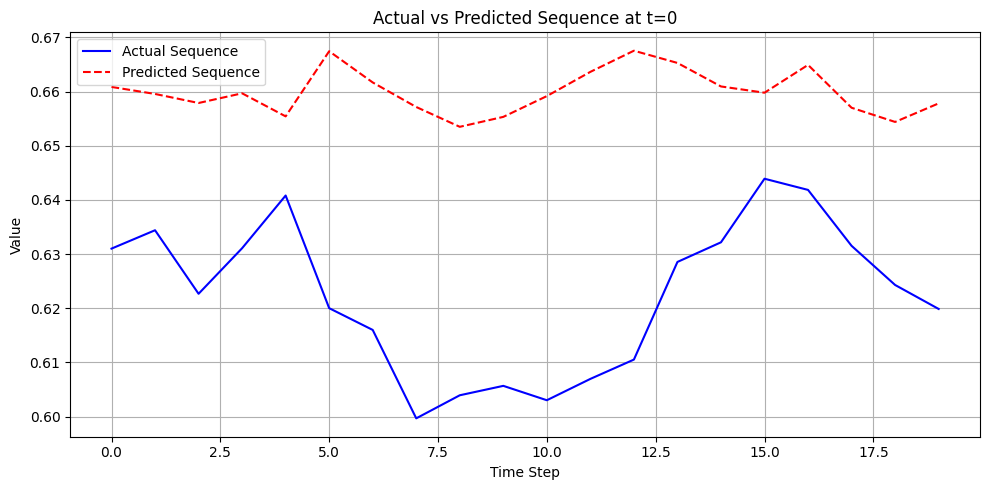

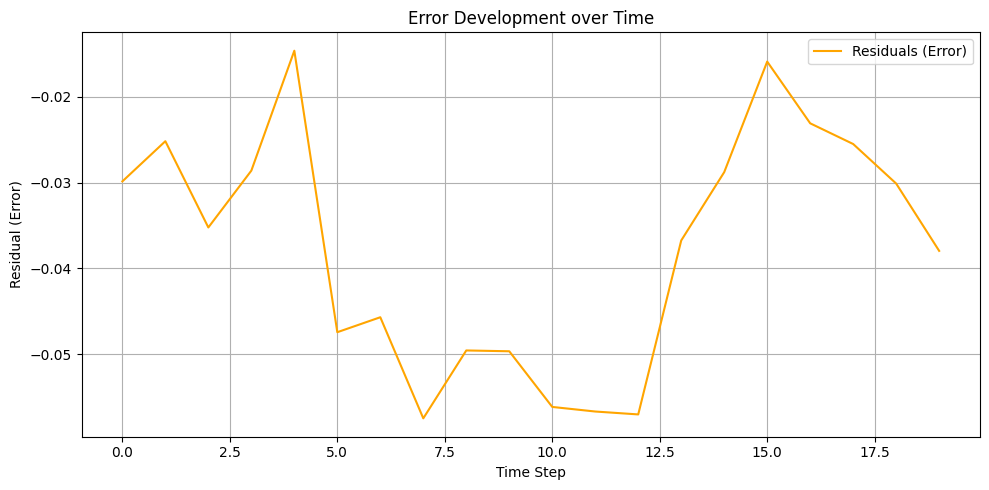

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Registered model 'Direct_LSTM_Model_simple' already exists. Creating a new version of this model...
Created version '4' of model 'Direct_LSTM_Model_simple'.


In [7]:
run_direct_lstm_experiment(
    build_direct_lstm_model_simple,
    'simple',
    'direct_simple',
    X_train_dir,
    y_train_dir,
    X_val_dir,
    y_val_dir,
    X_test_dir,
    y_test_dir,
    20,epochs=100,lstm_units=128)

Direct Simple

Model: "Direct_LSTM_Model_simple"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 100, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_layer (LSTM)               │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 20)             │         1,300 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,196 (71.08 KB)

 Trainable params: 18,196 (71.08 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0253 - mae: 0.0849 - mse: 0.0253
Epoch 1: val_loss improved from inf to 0.00138, saving model to models/saved/Direct_LSTM_Model_simple.keras
516/516 ━━━━━━━━━━━━━━━━━━━━ 26s 46ms/step - loss: 0.0253 - mae: 0.0848 - mse: 0.0253 - val_loss: 0.0014 - val_mae: 0.0300 - val_mse: 0.0014 - learning_rate: 0.0010
Epoch 2/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0012 - mae: 0.0278 - mse: 0.0012
Epoch 2: val_loss did not improve from 0.00138
516/516 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - loss: 0.0012 - mae: 0.0278 - mse: 0.0012 - val_loss: 0.0018 - val_mae: 0.0354 - val_mse: 0.0018 - learning_rate: 0.0010
Epoch 3/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0011 - mae: 0.0268 - mse: 0.0011
Epoch 3: val_loss did not improve from 0.00138
516/516 ━━━━━━━━━━━━━━━━━━━━ 22s 42ms/step - loss: 0.0011 - mae: 0.0268 - mse: 0.0011 - val_loss: 0.0014 - val_mae: 0.0301 - val_mse: 0.0014 - learning_rate: 0.0010
Epoch 4/100


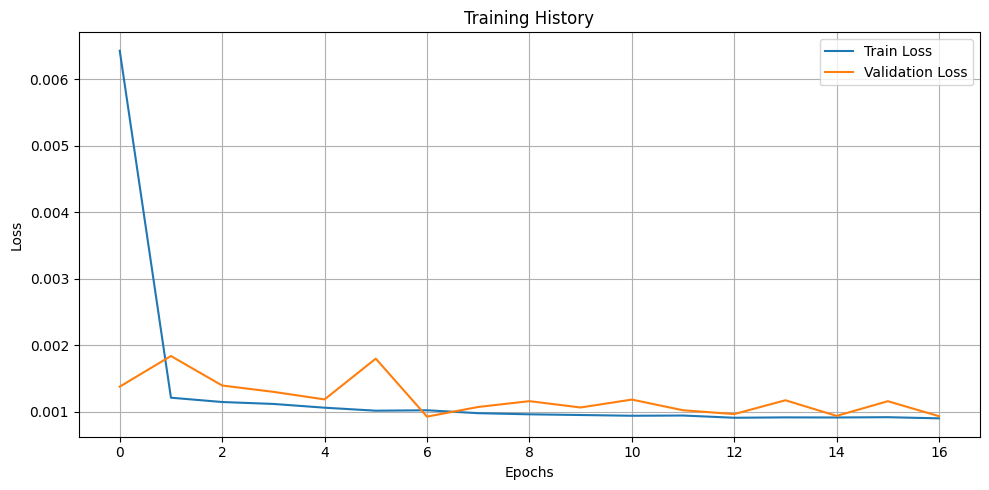

169/169 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step
  Metric       Value
0    MSE    0.001032
1    MAE    0.025554
2   RMSE    0.032128
3     R2    0.588292
4   MAPE    4.636100
5  SMAPE    4.571842
6    SAE  137.609697


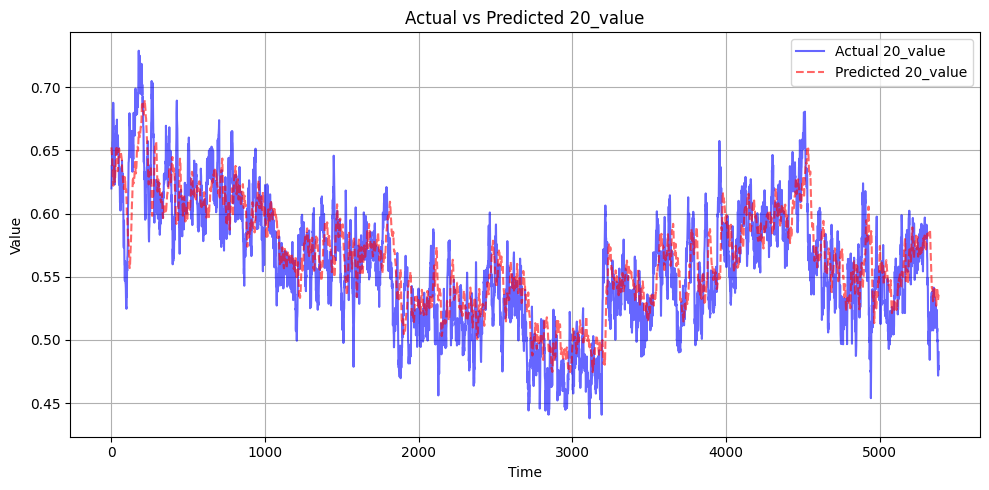

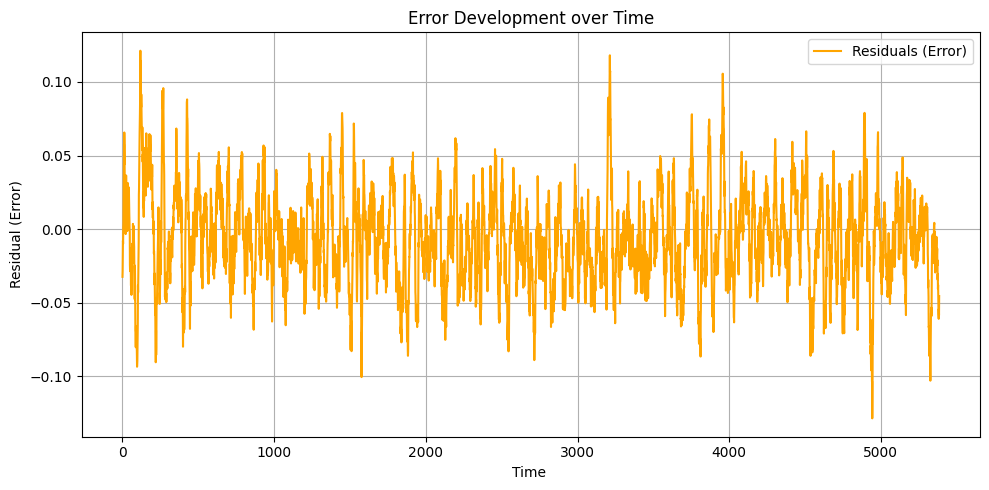

  Metric     Value
0    MSE  0.000688
1    MAE  0.022493
2   RMSE  0.026239
3     R2 -2.784451
4   MAPE  3.661434
5  SMAPE  3.571581
6    SAE  0.449864


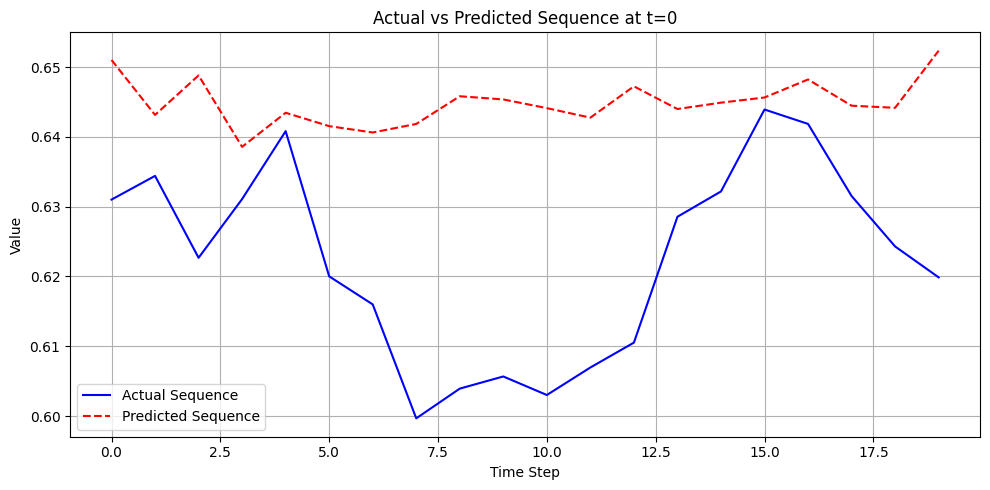

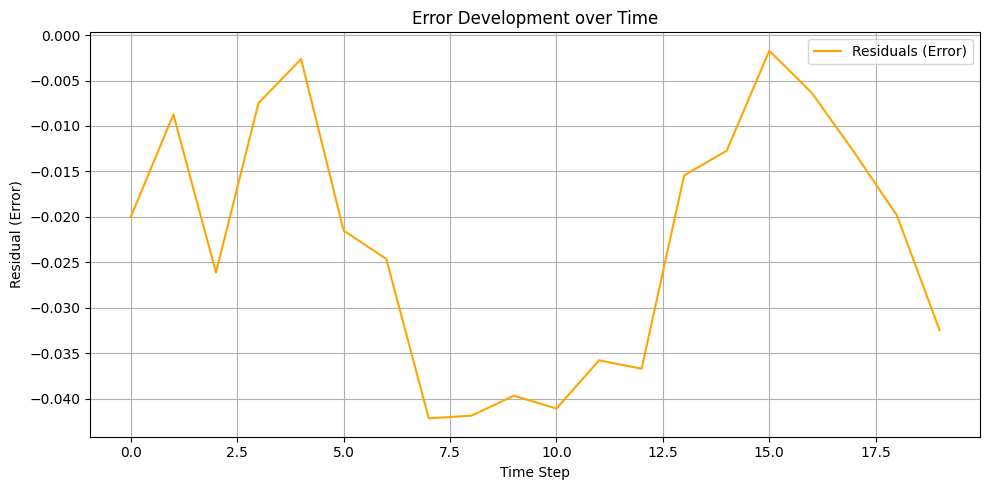

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Registered model 'Direct_LSTM_Model_simple' already exists. Creating a new version of this model...
Created version '3' of model 'Direct_LSTM_Model_simple'.


In [10]:
run_direct_lstm_experiment(
    build_direct_lstm_model_simple,
    'simple',
    'direct_simple',
    X_train_dir,
    y_train_dir,
    X_val_dir,
    y_val_dir,
    X_test_dir,
    y_test_dir,
    20,epochs=100,lstm_units=64)

Direct Average 128 units

Model: "Avarege_Direct_LSTM_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 100, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 100, 512)       │       528,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 512)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 256)            │       656,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │         2,580 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,220,244 (4.65 MB)

 Trainable params: 1,220,244 (4.65 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step - loss: 0.0172 - mae: 0.0842 - mse: 0.0172
Epoch 1: val_loss improved from inf to 0.00206, saving model to models/saved/Direct_LSTM_Model_average.keras
516/516 ━━━━━━━━━━━━━━━━━━━━ 178s 333ms/step - loss: 0.0172 - mae: 0.0841 - mse: 0.0172 - val_loss: 0.0021 - val_mae: 0.0379 - val_mse: 0.0021 - learning_rate: 0.0010
Epoch 2/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step - loss: 0.0023 - mae: 0.0378 - mse: 0.0023
Epoch 2: val_loss improved from 0.00206 to 0.00159, saving model to models/saved/Direct_LSTM_Model_average.keras
516/516 ━━━━━━━━━━━━━━━━━━━━ 179s 347ms/step - loss: 0.0023 - mae: 0.0378 - mse: 0.0023 - val_loss: 0.0016 - val_mae: 0.0325 - val_mse: 0.0016 - learning_rate: 0.0010
Epoch 3/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step - loss: 0.0018 - mae: 0.0334 - mse: 0.0018
Epoch 3: val_loss improved from 0.00159 to 0.00097, saving model to models/saved/Direct_LSTM_Model_average.keras
516/516 ━━━━━━━━━━━━━━━━━━━━ 176s 341

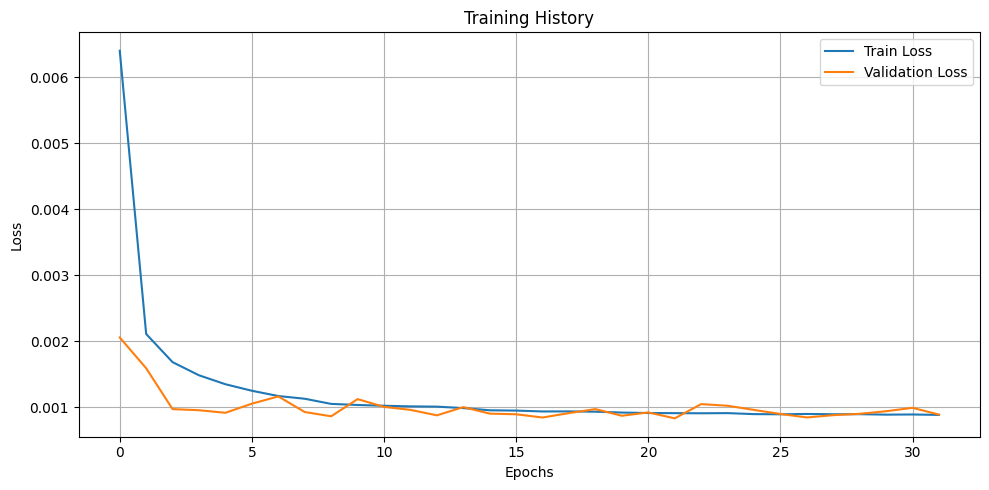

169/169 ━━━━━━━━━━━━━━━━━━━━ 17s 99ms/step
  Metric       Value
0    MSE    0.000918
1    MAE    0.023757
2   RMSE    0.030304
3     R2    0.633716
4   MAPE    4.286247
5  SMAPE    4.250666
6    SAE  127.931473


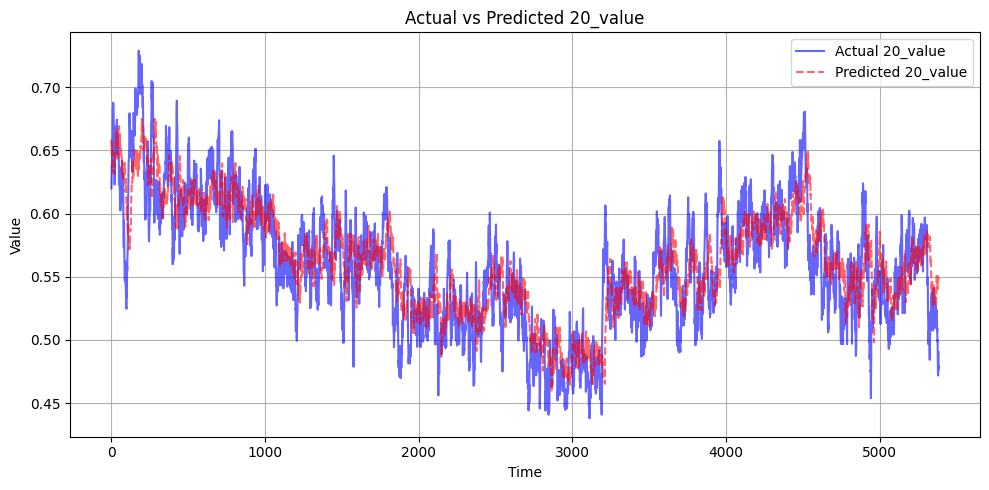

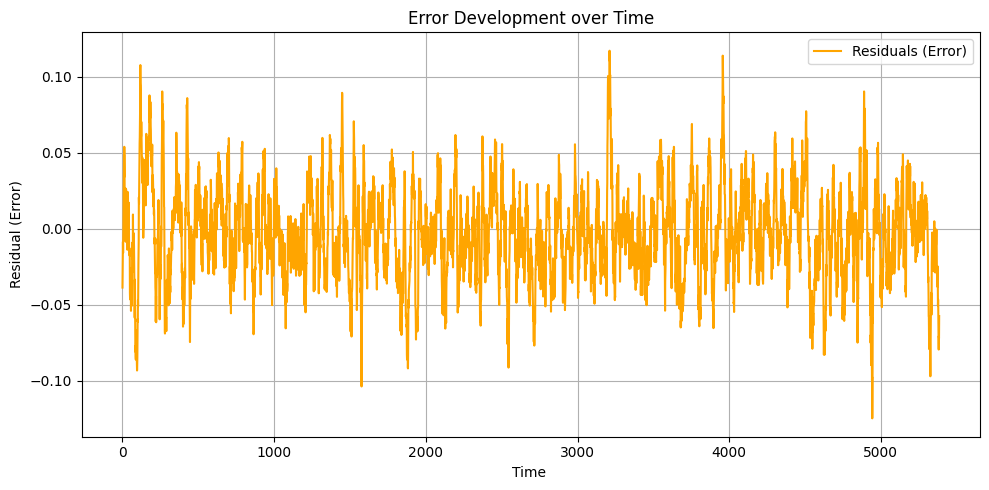

  Metric     Value
0    MSE  0.001519
1    MAE  0.036204
2   RMSE  0.038976
3     R2 -7.350400
4   MAPE  5.868946
5  SMAPE  5.674035
6    SAE  0.724080


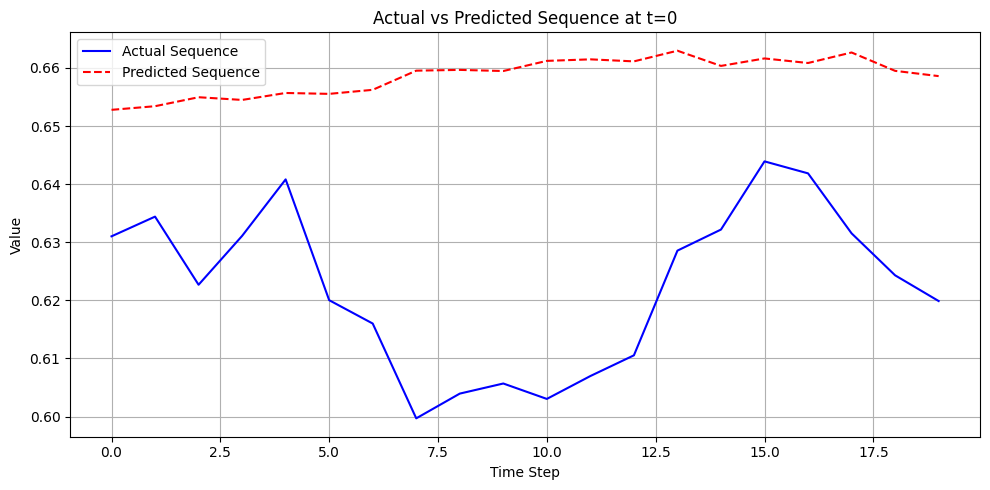

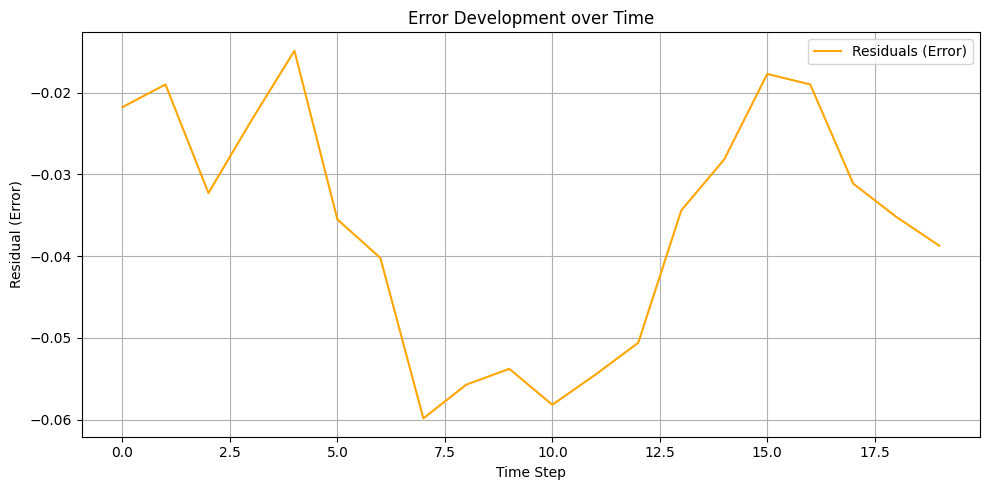

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Registered model 'Direct_LSTM_Model_average' already exists. Creating a new version of this model...
Created version '5' of model 'Direct_LSTM_Model_average'.


In [8]:
run_direct_lstm_experiment(
    build_direct_model_avg,
    'average',
    'direct_average',
    X_train_dir,
    y_train_dir,
    X_val_dir,
    y_val_dir,
    X_test_dir,
    y_test_dir,
    20,epochs=100,lstm_units=128)

Direct Average 64 units

Model: "Avarege_Direct_LSTM_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 100, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 100, 256)       │       133,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 100, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 128)            │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 20)             │         1,300 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 307,028 (1.17 MB)

 Trainable params: 307,028 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - loss: 0.0276 - mae: 0.1106 - mse: 0.0276
Epoch 1: val_loss improved from inf to 0.00131, saving model to models/saved/Direct_LSTM_Model_average.keras
516/516 ━━━━━━━━━━━━━━━━━━━━ 94s 172ms/step - loss: 0.0276 - mae: 0.1106 - mse: 0.0276 - val_loss: 0.0013 - val_mae: 0.0291 - val_mse: 0.0013 - learning_rate: 0.0010
Epoch 2/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - loss: 0.0031 - mae: 0.0439 - mse: 0.0031
Epoch 2: val_loss improved from 0.00131 to 0.00101, saving model to models/saved/Direct_LSTM_Model_average.keras
516/516 ━━━━━━━━━━━━━━━━━━━━ 85s 165ms/step - loss: 0.0031 - mae: 0.0439 - mse: 0.0031 - val_loss: 0.0010 - val_mae: 0.0252 - val_mse: 0.0010 - learning_rate: 0.0010
Epoch 3/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 0.0021 - mae: 0.0363 - mse: 0.0021
Epoch 3: val_loss did not improve from 0.00101
516/516 ━━━━━━━━━━━━━━━━━━━━ 79s 153ms/step - loss: 0.0021 - mae: 0.0363 - mse: 0.0021 - val_loss: 0.0013

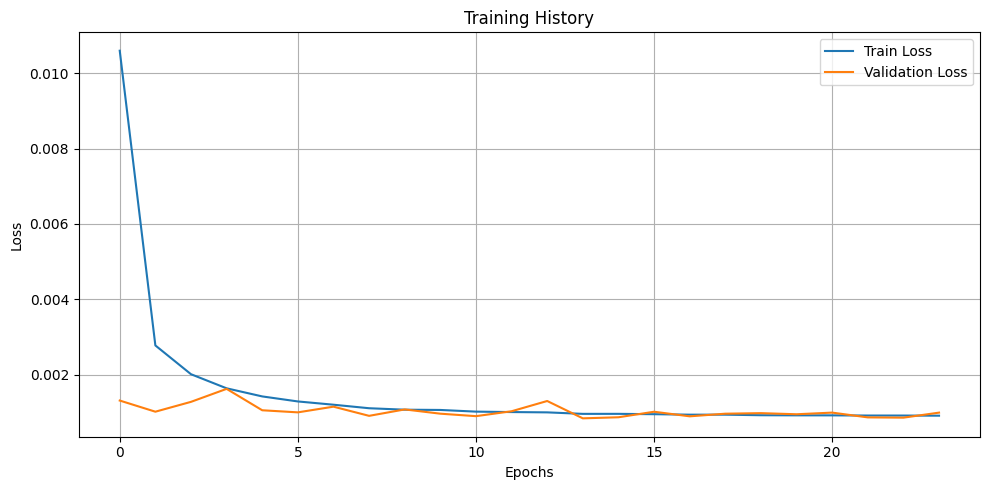

169/169 ━━━━━━━━━━━━━━━━━━━━ 13s 72ms/step
  Metric       Value
0    MSE    0.000916
1    MAE    0.023643
2   RMSE    0.030262
3     R2    0.634731
4   MAPE    4.257481
5  SMAPE    4.231848
6    SAE  127.319169


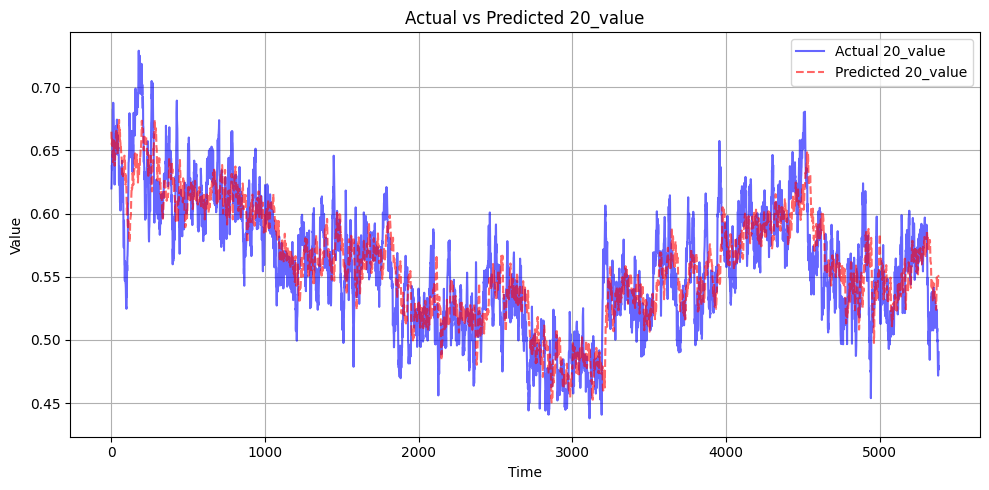

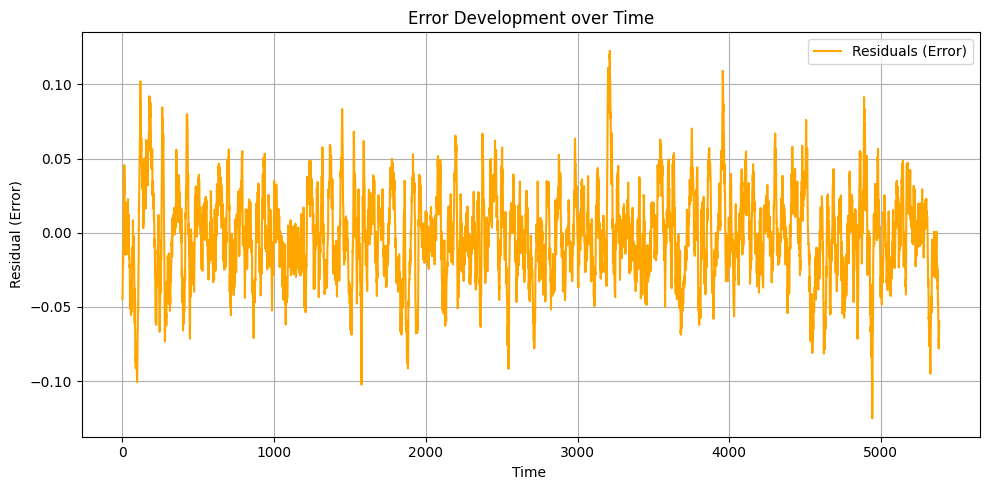

  Metric     Value
0    MSE  0.001641
1    MAE  0.037640
2   RMSE  0.040506
3     R2 -8.018935
4   MAPE  6.099637
5  SMAPE  5.889675
6    SAE  0.752803


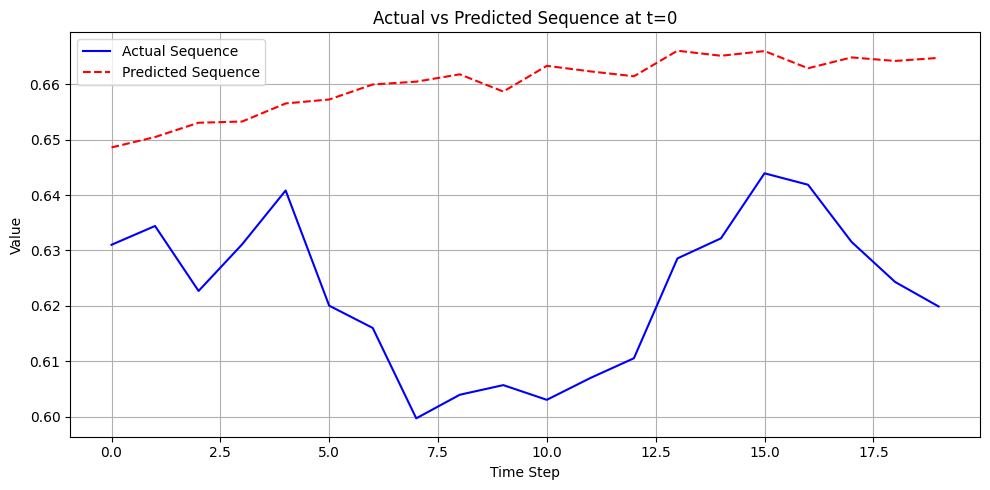

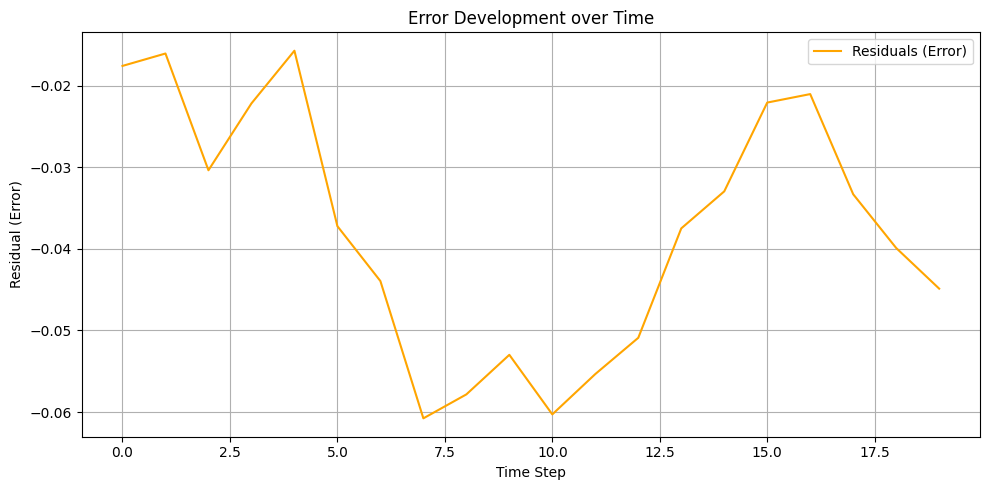

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Registered model 'Direct_LSTM_Model_average' already exists. Creating a new version of this model...
Created version '3' of model 'Direct_LSTM_Model_average'.


In [11]:

run_direct_lstm_experiment(
    build_direct_model_avg,
    'average',
    'direct_average',
    X_train_dir,
    y_train_dir,
    X_val_dir,
    y_val_dir,
    X_test_dir,
    y_test_dir,
    20,epochs=100,lstm_units=64)

Direct Average 32 units

Model: "Avarege_Direct_LSTM_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 100, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ (None, 100, 128)       │        33,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_5 (Bidirectional) │ (None, 64)             │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 20)             │           660 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 77,748 (303.70 KB)

 Trainable params: 77,748 (303.70 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - loss: 0.0465 - mae: 0.1483 - mse: 0.0465
Epoch 1: val_loss improved from inf to 0.00249, saving model to models/saved/Direct_LSTM_Model_average.keras
516/516 ━━━━━━━━━━━━━━━━━━━━ 69s 123ms/step - loss: 0.0465 - mae: 0.1482 - mse: 0.0465 - val_loss: 0.0025 - val_mae: 0.0422 - val_mse: 0.0025 - learning_rate: 0.0010
Epoch 2/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - loss: 0.0038 - mae: 0.0482 - mse: 0.0038
Epoch 2: val_loss improved from 0.00249 to 0.00146, saving model to models/saved/Direct_LSTM_Model_average.keras
516/516 ━━━━━━━━━━━━━━━━━━━━ 62s 119ms/step - loss: 0.0038 - mae: 0.0482 - mse: 0.0038 - val_loss: 0.0015 - val_mae: 0.0309 - val_mse: 0.0015 - learning_rate: 0.0010
Epoch 3/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - loss: 0.0027 - mae: 0.0411 - mse: 0.0027
Epoch 3: val_loss did not improve from 0.00146
516/516 ━━━━━━━━━━━━━━━━━━━━ 61s 118ms/step - loss: 0.0027 - mae: 0.0411 - mse: 0.0027 - val_loss: 0.0026

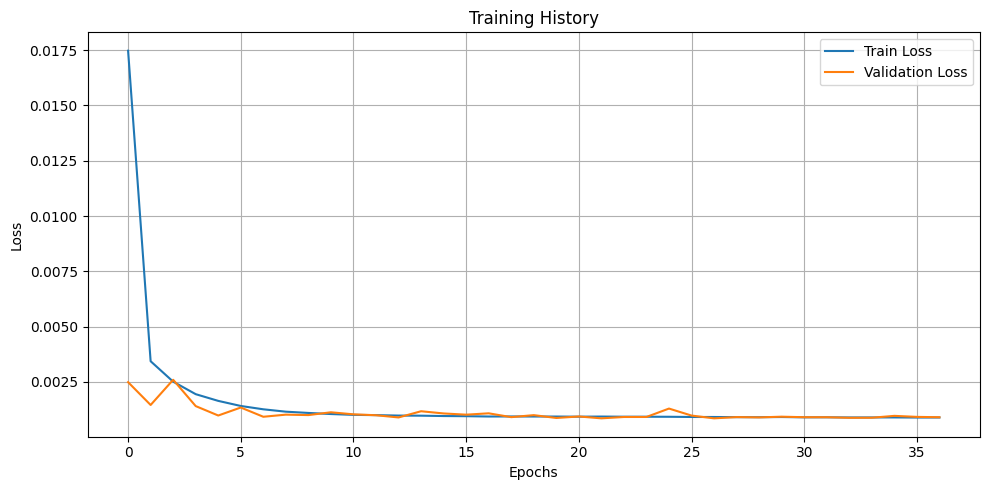

169/169 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step
  Metric       Value
0    MSE    0.000926
1    MAE    0.023720
2   RMSE    0.030428
3     R2    0.630699
4   MAPE    4.280387
5  SMAPE    4.245939
6    SAE  127.733871


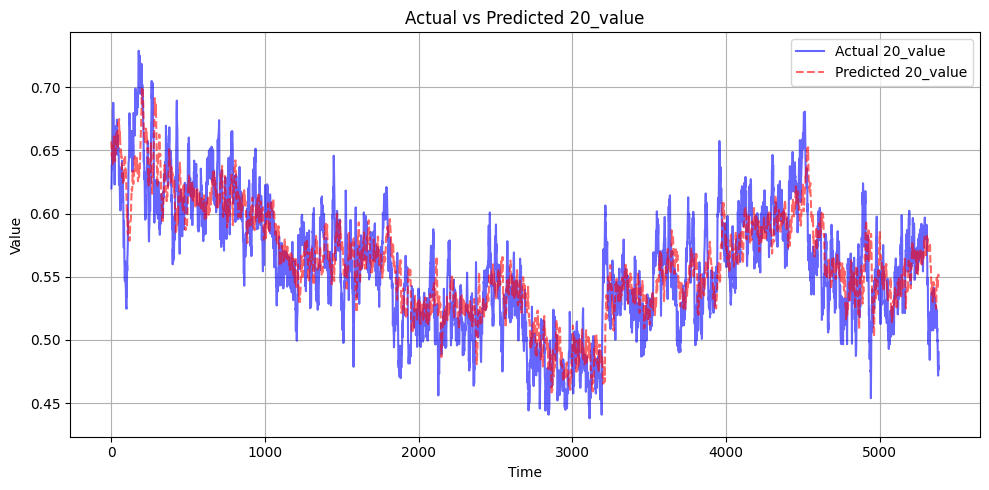

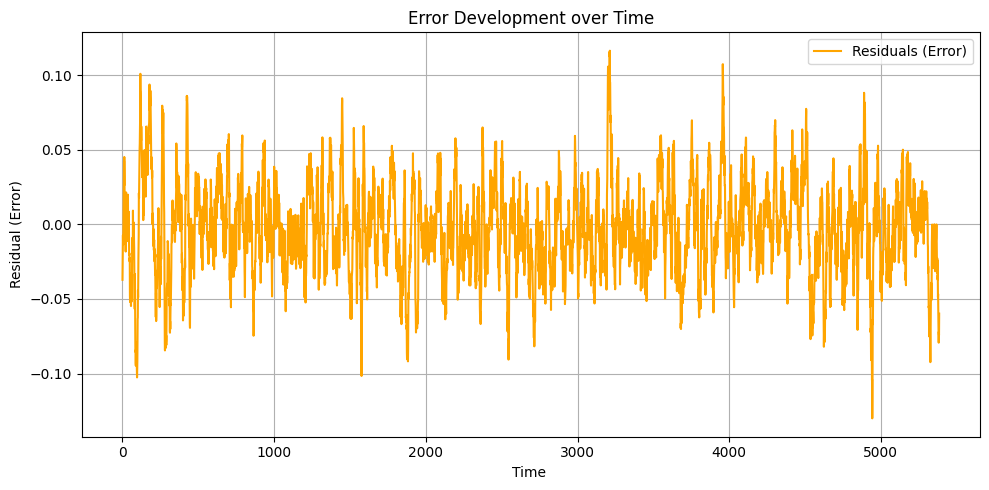

  Metric     Value
0    MSE  0.001430
1    MAE  0.035124
2   RMSE  0.037815
3     R2 -6.860410
4   MAPE  5.694740
5  SMAPE  5.510978
6    SAE  0.702487


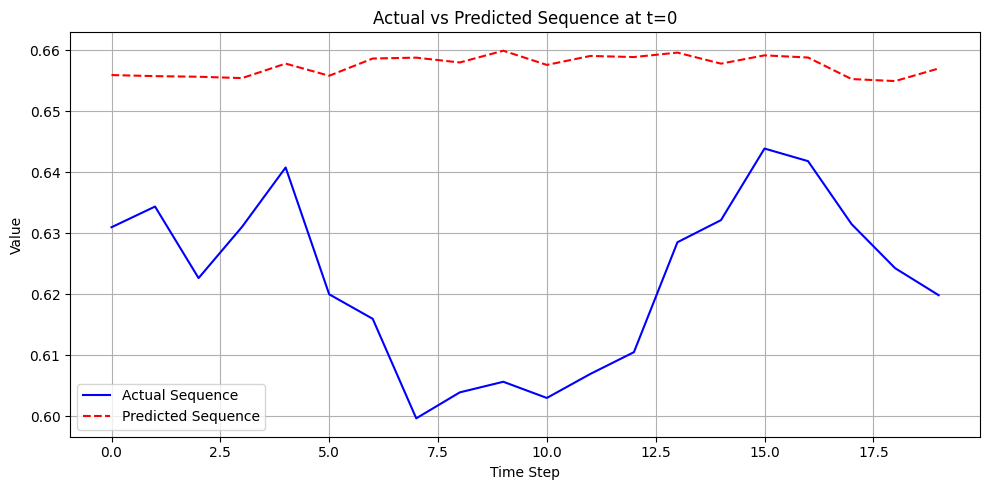

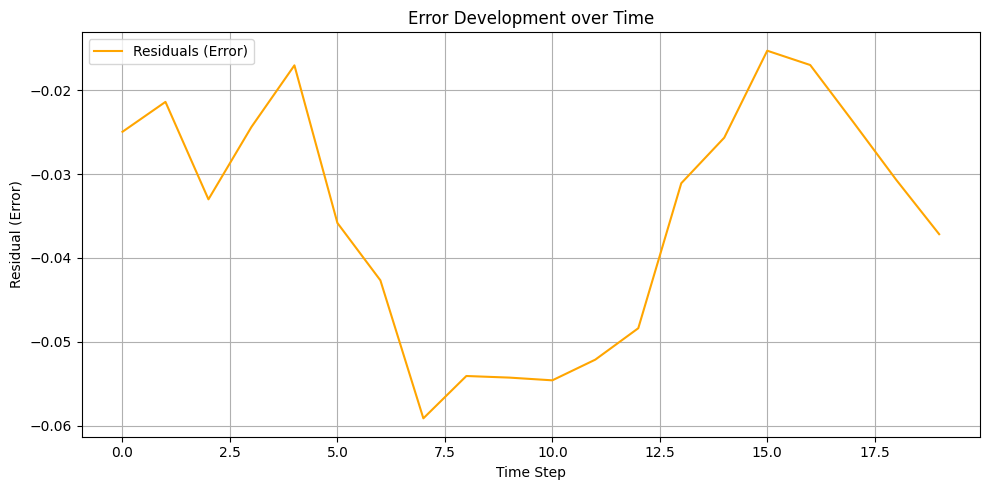

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Registered model 'Direct_LSTM_Model_average' already exists. Creating a new version of this model...
Created version '4' of model 'Direct_LSTM_Model_average'.


In [12]:
run_direct_lstm_experiment(
    build_direct_model_avg,
    'average',
    'direct_average',
    X_train_dir,
    y_train_dir,
    X_val_dir,
    y_val_dir,
    X_test_dir,
    y_test_dir,
    20,epochs=100,lstm_units=32)

Direct Advanced

Model: "Advanced_Direct_LSTM_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 100, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidir_lstm_1 (Bidirectional)    │ (None, 100, 128)       │        33,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_norm_1                    │ (None, 100, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 32)             │        20,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_norm_2                    │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 20)             │           660 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,892 (233.95 KB)

 Trainable params: 59,572 (232.70 KB)

 Non-trainable params: 320 (1.25 KB)

Epoch 1/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 0.1076 - mae: 0.2189 - mse: 0.1076
Epoch 1: val_loss improved from inf to 0.07088, saving model to models/saved/Direct_LSTM_Model_advanced.keras
516/516 ━━━━━━━━━━━━━━━━━━━━ 55s 98ms/step - loss: 0.1075 - mae: 0.2187 - mse: 0.1075 - val_loss: 0.0709 - val_mae: 0.2613 - val_mse: 0.0709 - learning_rate: 0.0010
Epoch 2/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 0.0040 - mae: 0.0500 - mse: 0.0040
Epoch 2: val_loss improved from 0.07088 to 0.02623, saving model to models/saved/Direct_LSTM_Model_advanced.keras
516/516 ━━━━━━━━━━━━━━━━━━━━ 52s 101ms/step - loss: 0.0040 - mae: 0.0500 - mse: 0.0040 - val_loss: 0.0262 - val_mae: 0.1574 - val_mse: 0.0262 - learning_rate: 0.0010
Epoch 3/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 0.0023 - mae: 0.0377 - mse: 0.0023
Epoch 3: val_loss improved from 0.02623 to 0.01405, saving model to models/saved/Direct_LSTM_Model_advanced.keras
516/516 ━━━━━━━━━━━━━━━━━━━━ 55s 106ms/s

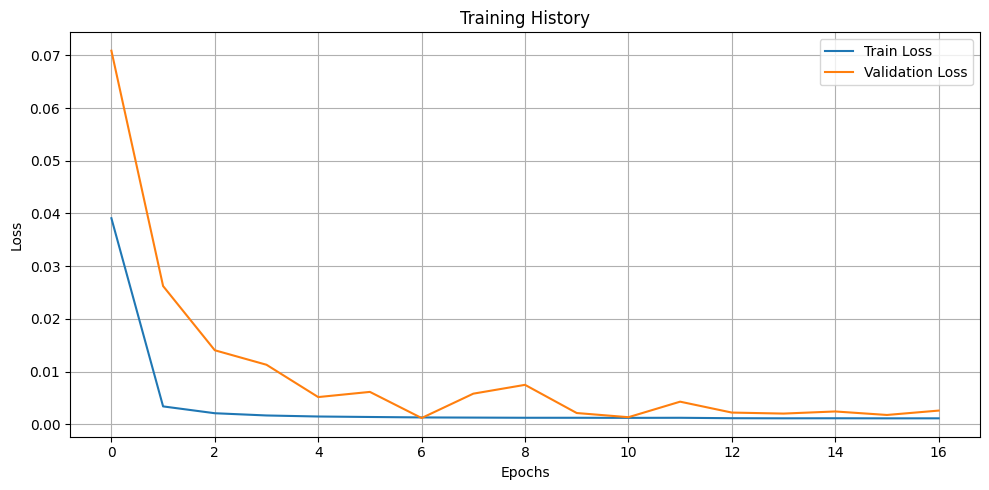

169/169 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step
  Metric       Value
0    MSE    0.001158
1    MAE    0.026813
2   RMSE    0.034033
3     R2    0.538024
4   MAPE    4.730761
5  SMAPE    4.802120
6    SAE  144.385386


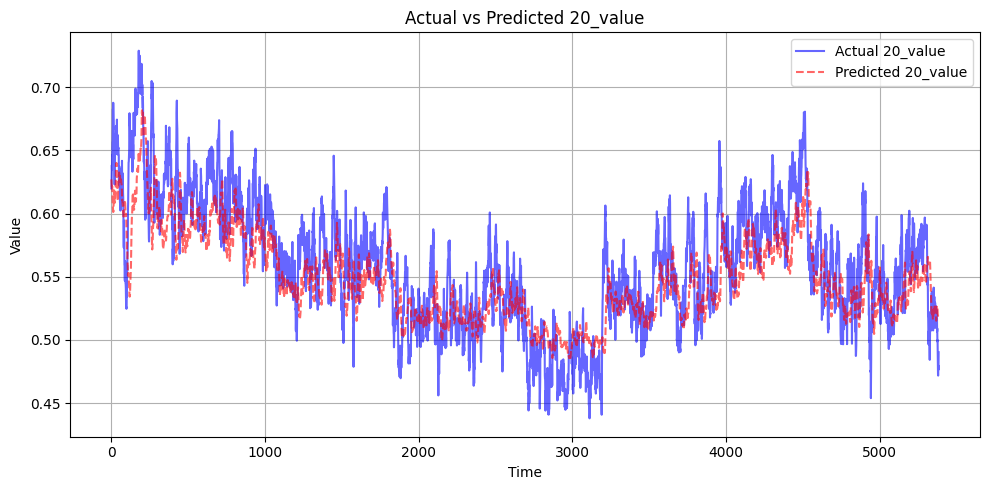

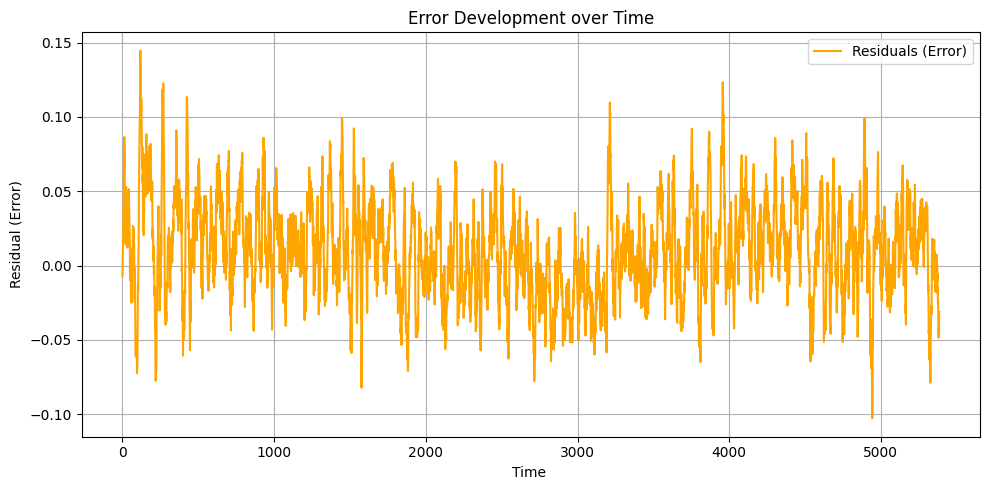

  Metric     Value
0    MSE  0.000479
1    MAE  0.017986
2   RMSE  0.021891
3     R2 -1.634037
4   MAPE  2.924539
5  SMAPE  2.865229
6    SAE  0.359718


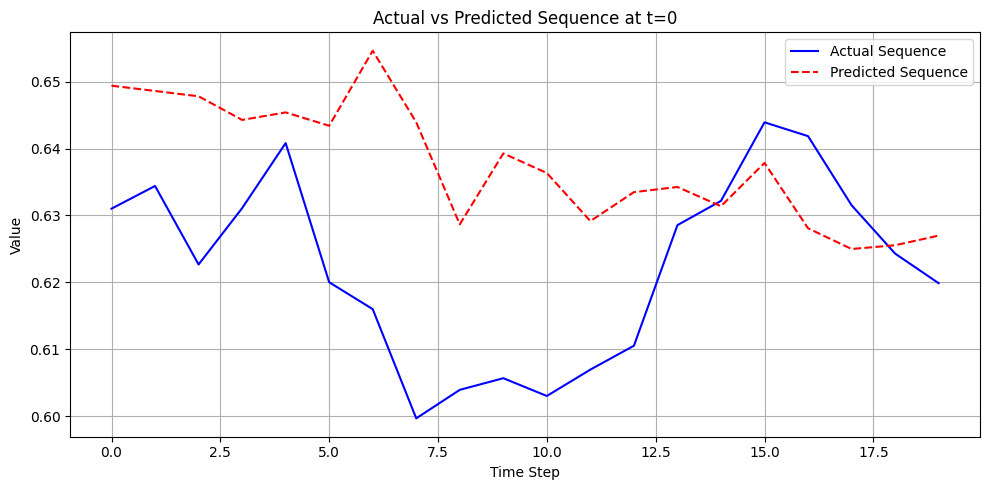

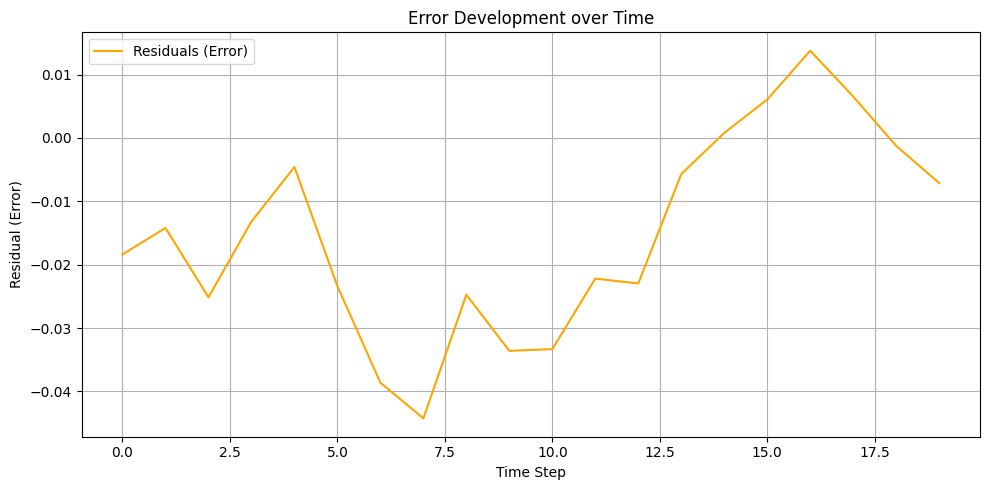

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Registered model 'Direct_LSTM_Model_advanced' already exists. Creating a new version of this model...
Created version '3' of model 'Direct_LSTM_Model_advanced'.


In [13]:
run_direct_lstm_experiment(
    build_advanced_direct_lstm,
    'advanced',
    'direct_advanced',
    X_train_dir,
    y_train_dir,
    X_val_dir,
    y_val_dir,
    X_test_dir,
    y_test_dir,
    20,epochs=100,lstm_units=64)

Recursive Model

In [41]:
from autoregression.models.RecurLSTM import build_recursive_lstm_simple


Recursive Simple

Model: "Recursive_LSTM_Model_simple"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 100, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_layer (LSTM)               │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,961 (66.25 KB)

 Trainable params: 16,961 (66.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
515/516 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0105 - mae: 0.0502 - mse: 0.0105
Epoch 1: val_loss improved from inf to 0.00050, saving model to models/saved/Recursive_LSTM_Model_simple.keras
516/516 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - loss: 0.0104 - mae: 0.0501 - mse: 0.0104 - val_loss: 4.9504e-04 - val_mae: 0.0178 - val_mse: 4.9504e-04 - learning_rate: 0.0010
Epoch 2/100
514/516 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 4.4489e-04 - mae: 0.0168 - mse: 4.4489e-04
Epoch 2: val_loss improved from 0.00050 to 0.00033, saving model to models/saved/Recursive_LSTM_Model_simple.keras
516/516 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - loss: 4.4477e-04 - mae: 0.0168 - mse: 4.4477e-04 - val_loss: 3.2985e-04 - val_mae: 0.0144 - val_mse: 3.2985e-04 - learning_rate: 0.0010
Epoch 3/100
515/516 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.4540e-04 - mae: 0.0148 - mse: 3.4540e-04
Epoch 3: val_loss improved from 0.00033 to 0.00030, saving model to models/saved/Recursive_LSTM_Model_simple.kera

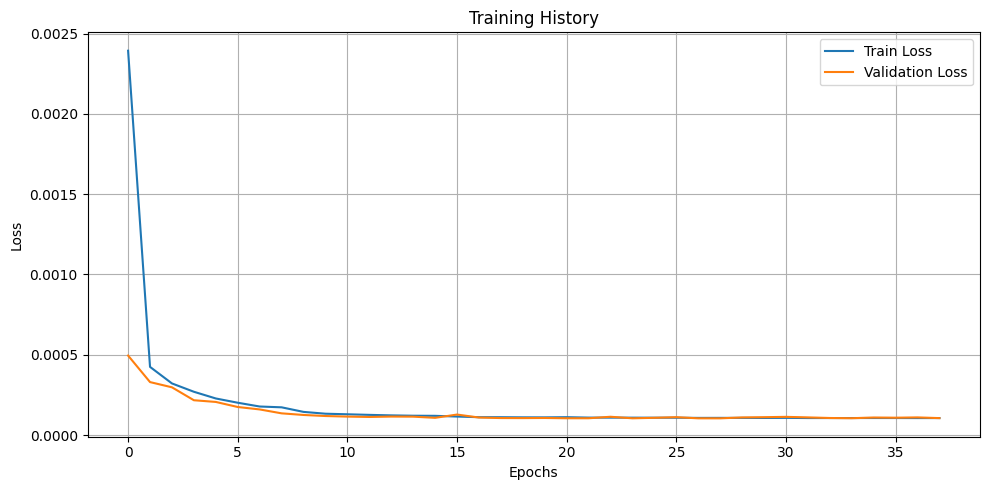

  Metric       Value
0    MSE    0.001175
1    MAE    0.027646
2   RMSE    0.034279
3     R2    0.552002
4   MAPE    5.058365
5  SMAPE    4.937416
6    SAE  138.231778


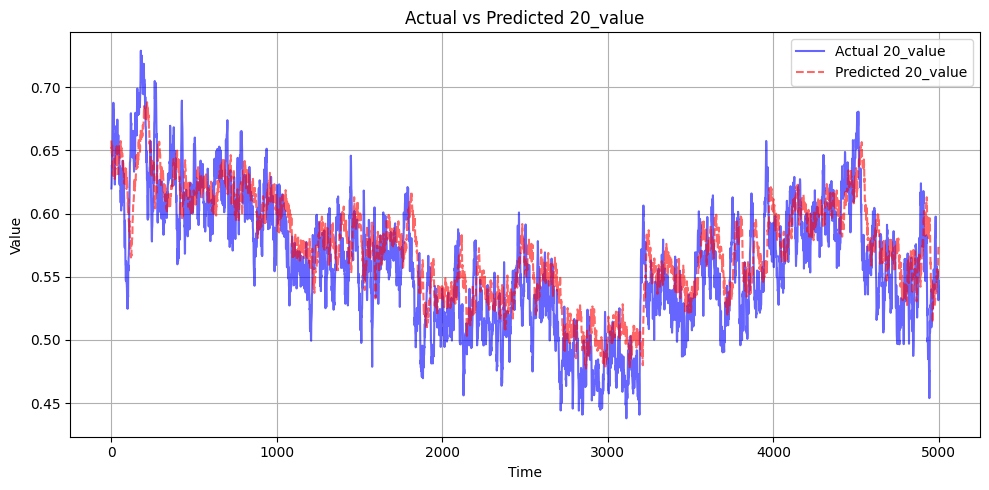

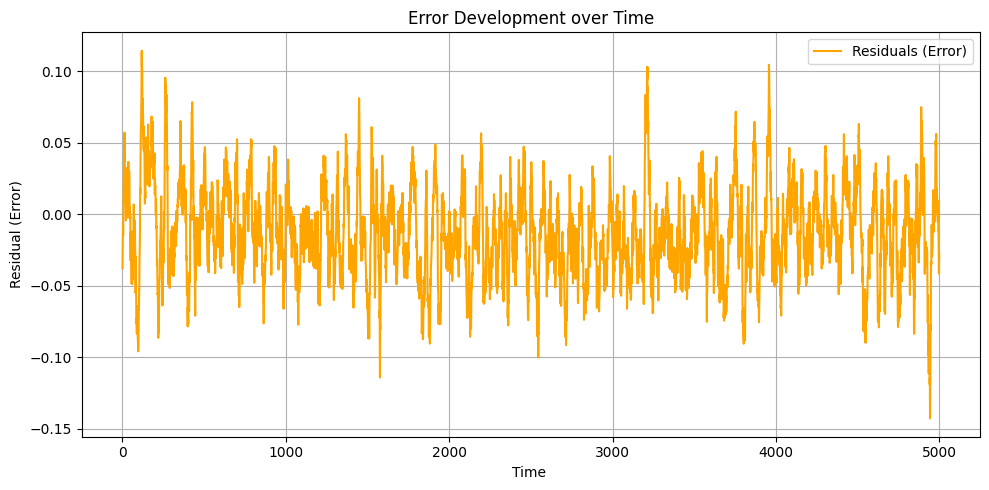

  Metric     Value
0    MSE  0.001111
1    MAE  0.030223
2   RMSE  0.033331
3     R2 -5.106532
4   MAPE  4.904937
5  SMAPE  4.761486
6    SAE  0.604462


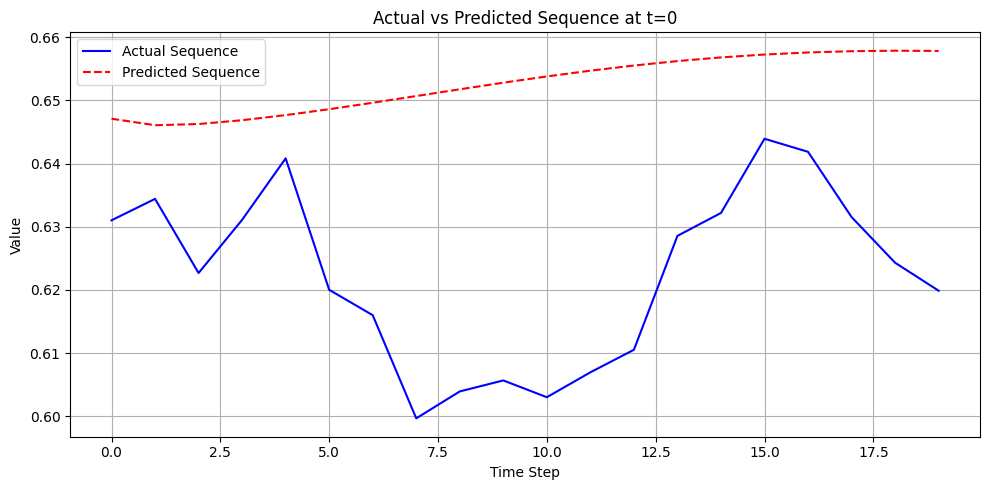

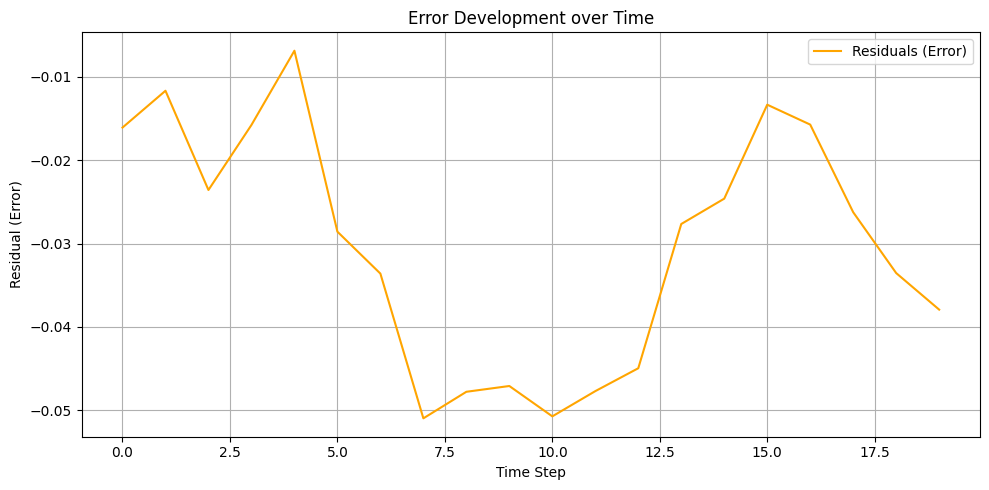

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Successfully registered model 'Recursive_LSTM_Model_simple'.
Created version '1' of model 'Recursive_LSTM_Model_simple'.


In [42]:
run_recursive_lstm_experiment(
    build_recursive_lstm_simple,
    'simple',
    'recursive_simple',
    X_train_rec,
    y_train_rec,
    X_val_rec,
    y_val_rec,
    X_test_rec,
    y_test_dir,
    n_predicted_rows=5000,
    output_steps=20,
    epochs=100)

Sequence to sequence model

In [38]:
from autoregression.utils_ar import run_seq2seq_lstm_experiment
from autoregression.models.seq2seq_lstm import build_seq2seq_lstm_simple

Seq2Seq Simple

Model: "Seq2Seq_LSTM_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ encoder_input (InputLayer)      │ (None, 100, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder_lstm (LSTM)             │ (None, 32)             │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector (RepeatVector)    │ (None, 20, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_lstm (LSTM)             │ (None, 20, 32)         │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_output         │ (None, 20, 1)          │            33 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,705 (49.63 KB)

 Trainable params: 12,705 (49.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0133 - mae: 0.0707 - mse: 0.0133
Epoch 1: val_loss improved from inf to 0.00141, saving model to models/saved/Seq2seq_LSTM_Model_simple.keras
516/516 ━━━━━━━━━━━━━━━━━━━━ 18s 28ms/step - loss: 0.0132 - mae: 0.0707 - mse: 0.0132 - val_loss: 0.0014 - val_mae: 0.0307 - val_mse: 0.0014 - learning_rate: 0.0010
Epoch 2/30
515/516 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0012 - mae: 0.0279 - mse: 0.0012
Epoch 2: val_loss improved from 0.00141 to 0.00124, saving model to models/saved/Seq2seq_LSTM_Model_simple.keras
516/516 ━━━━━━━━━━━━━━━━━━━━ 14s 27ms/step - loss: 0.0012 - mae: 0.0279 - mse: 0.0012 - val_loss: 0.0012 - val_mae: 0.0286 - val_mse: 0.0012 - learning_rate: 0.0010
Epoch 3/30
515/516 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0012 - mae: 0.0274 - mse: 0.0012
Epoch 3: val_loss did not improve from 0.00124
516/516 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - loss: 0.0012 - mae: 0.0274 - mse: 0.0012 - val_loss: 0.0014 - val_ma

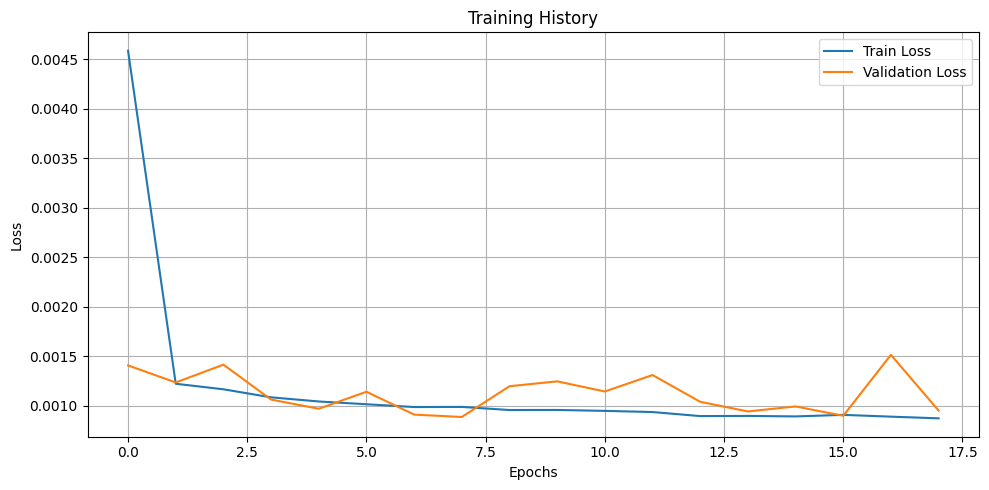

169/169 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
  Metric       Value
0    MSE    0.001001
1    MAE    0.024937
2   RMSE    0.031631
3     R2    0.600926
4   MAPE    4.490235
5  SMAPE    4.458549
6    SAE  134.287732


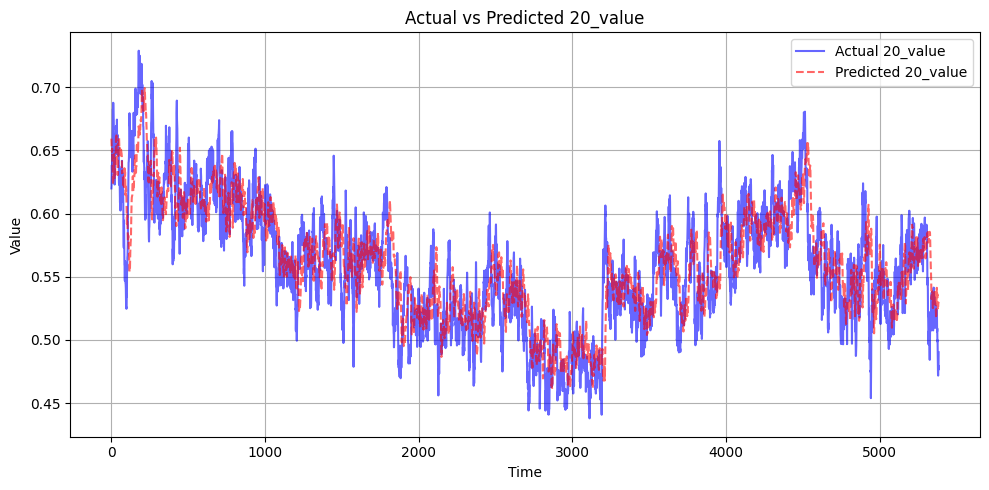

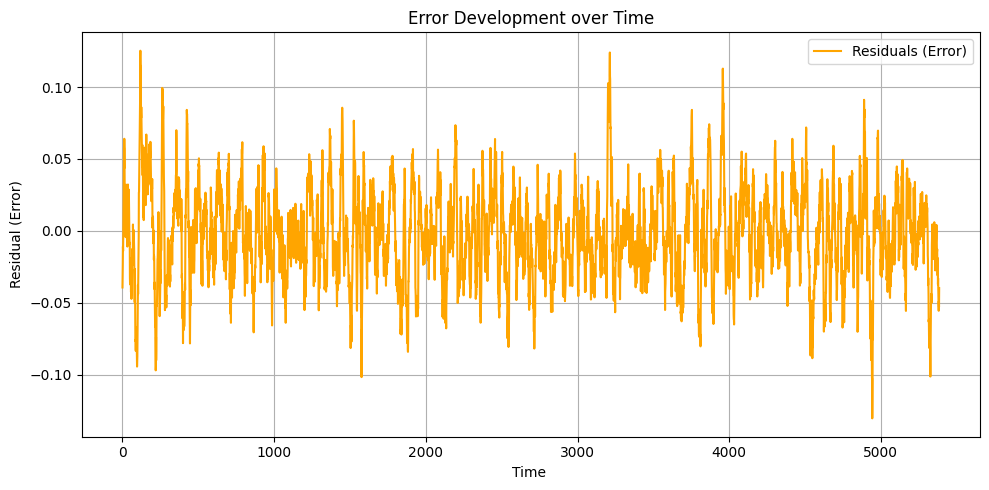

  Metric     Value
0    MSE  0.001543
1    MAE  0.036573
2   RMSE  0.039278
3     R2 -7.480304
4   MAPE  5.928509
5  SMAPE  5.730660
6    SAE  0.731469


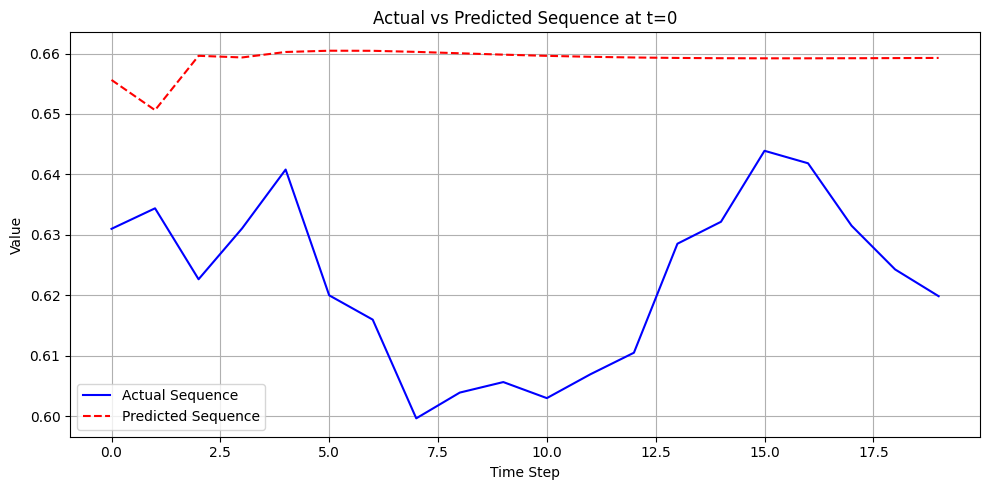

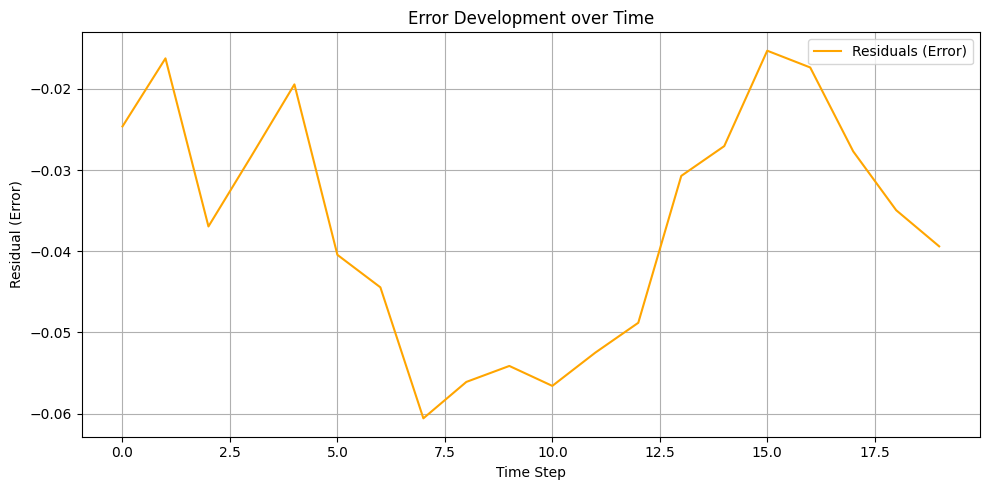

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Registered model 'Seq2seq_LSTM_Model_simple' already exists. Creating a new version of this model...
Created version '3' of model 'Seq2seq_LSTM_Model_simple'.


In [39]:

run_seq2seq_lstm_experiment(build_seq2seq_lstm_simple,
                            'simple',
                            'seq2seq_simple',
                            X_train=X_train_dir,
                            X_test=X_test_dir,
                            X_val=X_val_dir,
                            y_test=y_test_dir,
                            y_train=y_train_dir,
                            y_val=y_val_dir,
                            output_steps=20,
                            lstm_units=32)

Hybrid Model

In [21]:
from autoregression.utils_ar import run_direct_refiner_experiment
from autoregression.models.RefineLSTM import build_refinement_cnn_model_simple,build_refinement_lstm_model_simple,build_average_refinement_lstm
import mlflow.keras

Hybrid: Direct Simple + Refine LSTM Simple 

516/516 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step
169/169 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step
(20, 1)


Model: "Refinement_LSTM_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ refinement_input (InputLayer)   │ (None, 20, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ refinement_lstm (LSTM)          │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ refined_20th_output (Dense)     │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,961 (66.25 KB)

 Trainable params: 16,961 (66.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
514/516 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0159 - mae: 0.0670 - mse: 0.0159
Epoch 1: val_loss improved from inf to 0.00139, saving model to models/saved/Direct_Refiner_Model_simple_lstm_simple.keras
516/516 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0158 - mae: 0.0669 - mse: 0.0158 - val_loss: 0.0014 - val_mae: 0.0303 - val_mse: 0.0014 - learning_rate: 0.0010
Epoch 2/30
509/516 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0014 - mae: 0.0297 - mse: 0.0014
Epoch 2: val_loss did not improve from 0.00139
516/516 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0014 - mae: 0.0297 - mse: 0.0014 - val_loss: 0.0016 - val_mae: 0.0323 - val_mse: 0.0016 - learning_rate: 0.0010
Epoch 3/30
510/516 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0014 - mae: 0.0300 - mse: 0.0014
Epoch 3: val_loss did not improve from 0.00139
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0014 - mae: 0.0300 - mse: 0.0014 - val_loss: 0.0016 - val_mae: 0.0324 - val_mse: 0.0016 - learning_rate: 0.0010
Epoch 4/3

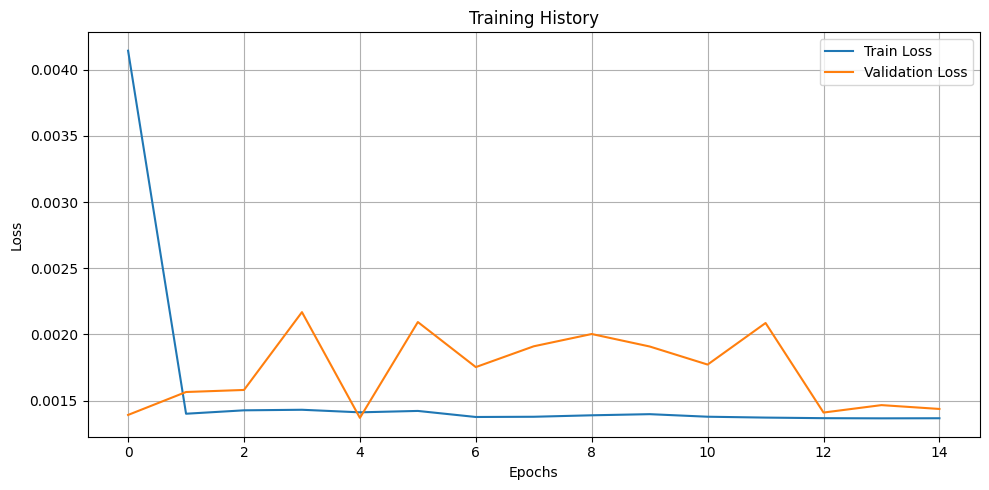

169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
  Metric       Value
0    MSE    0.000946
1    MAE    0.024211
2   RMSE    0.030765
3     R2    0.622487
4   MAPE    4.377203
5  SMAPE    4.331322
6    SAE  130.374342


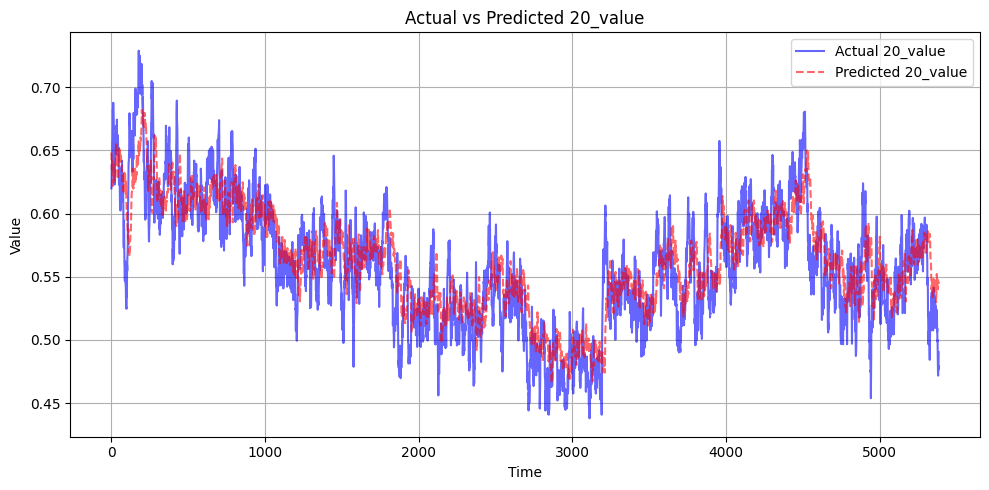

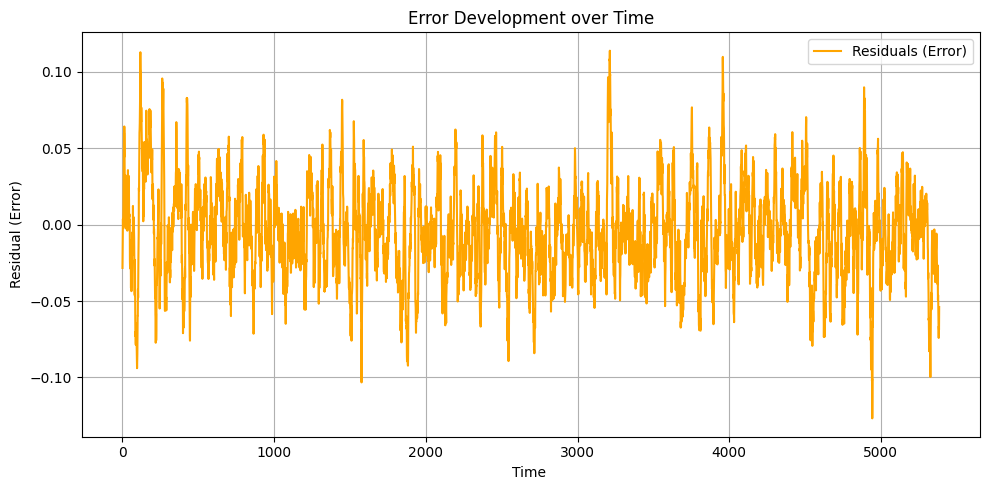

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Registered model 'Direct_Refiner_Model_simple_lstm_simple' already exists. Creating a new version of this model...
Created version '2' of model 'Direct_Refiner_Model_simple_lstm_simple'.


In [ ]:

dir_model = mlflow.keras.load_model("models:/Direct_LSTM_Model_simple/4") 
run_direct_refiner_experiment(build_refinement_lstm_model_simple,
                              dir_model,
                              'simple_lstm_simple',
                              'ref_simple_lstm_simple',
                              X_train_dir=X_train_dir,
                              X_test_dir=X_test_dir,
                              X_val_dir=X_val_dir,
                              y_test_dir=y_test_dir,
                              y_train_dir=y_train_dir,
                              y_val_dir=y_val_dir,
                              output_steps=20,
                              units=64)

Hybrid: Direct Simple + Refine CNN Simple 

516/516 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step
169/169 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step
(20, 1)


Model: "Base_CNN_Refiner"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ refinement_input (InputLayer)   │ (None, 20, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 18, 16)         │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_2          │ (None, 16)             │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ refined_output (Dense)          │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
491/516 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0253 - mae: 0.0968
Epoch 1: val_loss improved from inf to 0.00272, saving model to models/saved/Direct_Refiner_Model_simple_cnn_simple.keras
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0244 - mae: 0.0944 - val_loss: 0.0027 - val_mae: 0.0436 - learning_rate: 0.0010
Epoch 2/30
513/516 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0015 - mae: 0.0311
Epoch 2: val_loss improved from 0.00272 to 0.00201, saving model to models/saved/Direct_Refiner_Model_simple_cnn_simple.keras
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0015 - mae: 0.0311 - val_loss: 0.0020 - val_mae: 0.0369 - learning_rate: 0.0010
Epoch 3/30
499/516 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0014 - mae: 0.0302
Epoch 3: val_loss improved from 0.00201 to 0.00169, saving model to models/saved/Direct_Refiner_Model_simple_cnn_simple.keras
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0014 - mae: 0.0302 - val_loss: 0.0017 - val_mae: 0.0335 - learning_rat

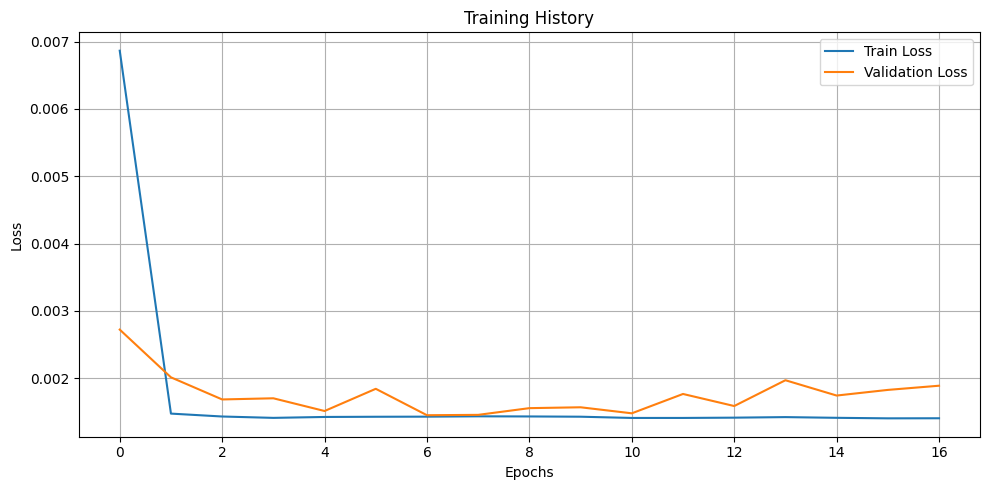

169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
  Metric       Value
0    MSE    0.000959
1    MAE    0.024310
2   RMSE    0.030961
3     R2    0.617651
4   MAPE    4.367289
5  SMAPE    4.347070
6    SAE  130.909086


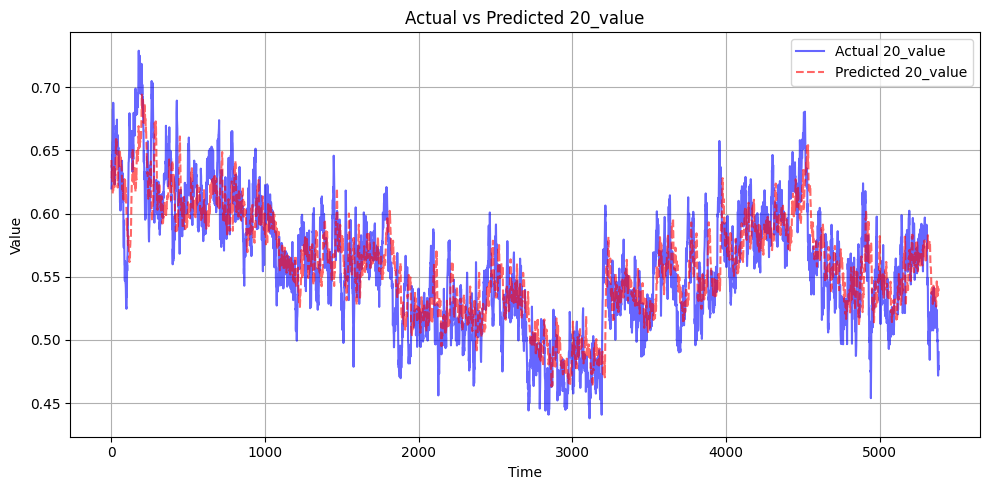

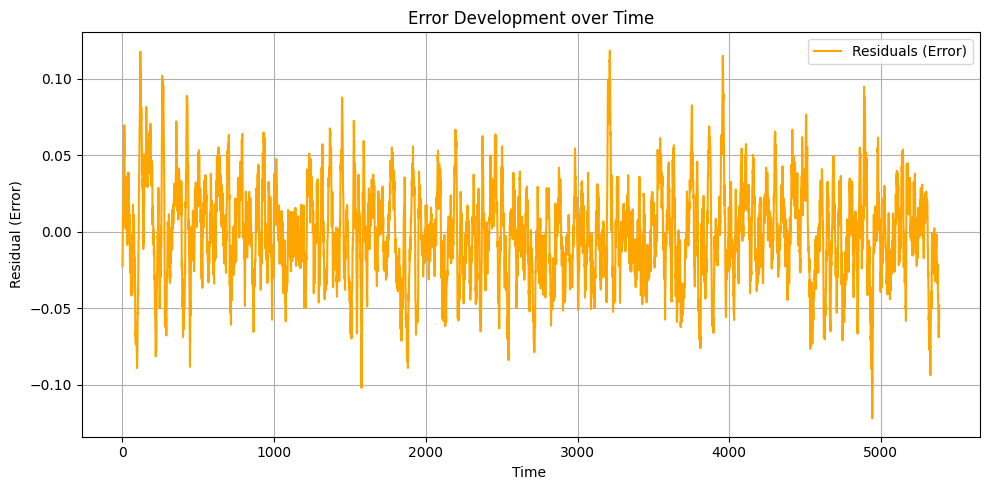

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Registered model 'Direct_Refiner_Model_simple_cnn_simple' already exists. Creating a new version of this model...
Created version '3' of model 'Direct_Refiner_Model_simple_cnn_simple'.


In [31]:
dir_model = mlflow.keras.load_model("models:/Direct_LSTM_Model_simple/4") 
run_direct_refiner_experiment(build_refinement_cnn_model_simple,
                              dir_model,
                              'simple_cnn_simple',
                              'ref_simple_cnn_simple',
                              X_train_dir=X_train_dir,
                              X_test_dir=X_test_dir,
                              X_val_dir=X_val_dir,
                              y_test_dir=y_test_dir,
                              y_train_dir=y_train_dir,
                              y_val_dir=y_val_dir,
                              output_steps=20,
                              units=32)

Hybrid: Direct Simple + Refine LSTM Average

516/516 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step
169/169 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step
(20, 1)


Model: "Refiner_LSTM_Average"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ refinement_input (InputLayer)   │ (None, 20, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_38 (LSTM)                  │ (None, 20, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_39 (Dropout)            │ (None, 20, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_39 (LSTM)                  │ (None, 20, 32)         │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_40 (Dropout)            │ (None, 20, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_40 (LSTM)                  │ (None, 16)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_41 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,465 (126.82 KB)

 Trainable params: 32,465 (126.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0218 - mae: 0.0987 - mse: 0.0218
Epoch 1: val_loss improved from inf to 0.00238, saving model to models/saved/Direct_Refiner_Model_simple_lstm_avg.keras
516/516 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - loss: 0.0218 - mae: 0.0986 - mse: 0.0218 - val_loss: 0.0024 - val_mae: 0.0406 - val_mse: 0.0024 - learning_rate: 0.0010
Epoch 2/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0046 - mae: 0.0542 - mse: 0.0046
Epoch 2: val_loss improved from 0.00238 to 0.00206, saving model to models/saved/Direct_Refiner_Model_simple_lstm_avg.keras
516/516 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 0.0046 - mae: 0.0542 - mse: 0.0046 - val_loss: 0.0021 - val_mae: 0.0375 - val_mse: 0.0021 - learning_rate: 0.0010
Epoch 3/30
513/516 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0034 - mae: 0.0459 - mse: 0.0034
Epoch 3: val_loss improved from 0.00206 to 0.00175, saving model to models/saved/Direct_Refiner_Model_simple_lstm_avg.keras
516/516 ━━━━━━━

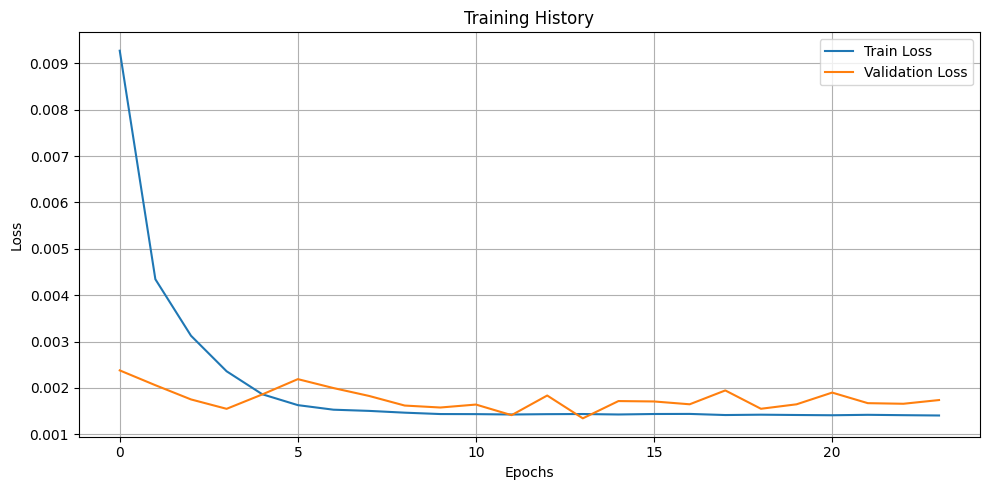

169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
  Metric       Value
0    MSE    0.000988
1    MAE    0.024874
2   RMSE    0.031425
3     R2    0.606120
4   MAPE    4.522718
5  SMAPE    4.450688
6    SAE  133.946168


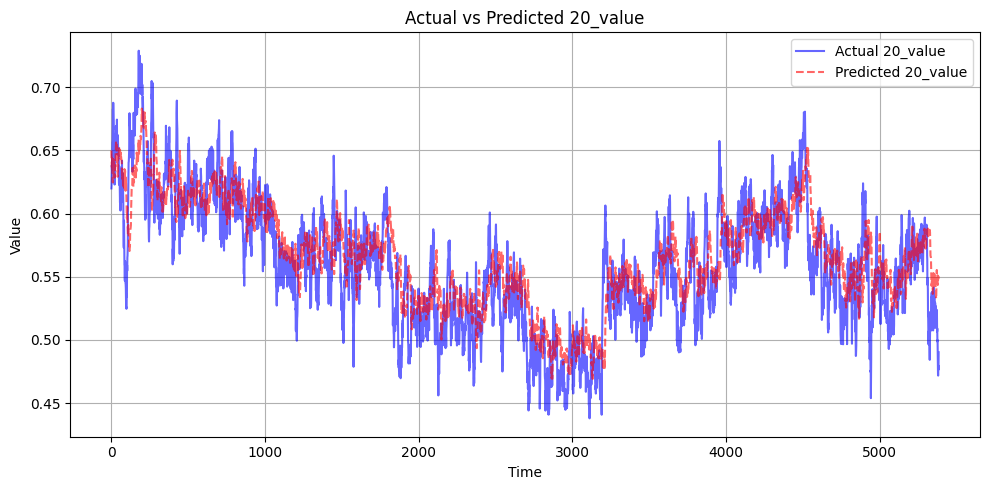

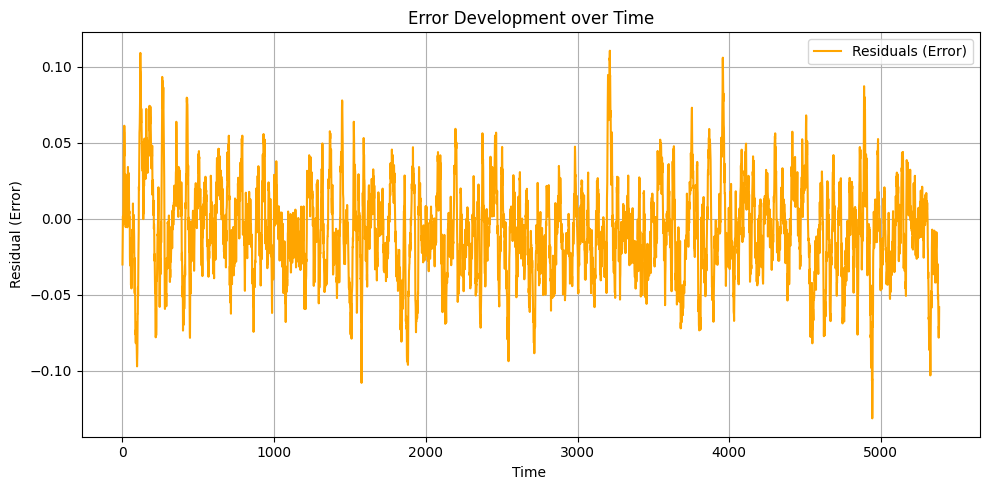

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Registered model 'Direct_Refiner_Model_simple_lstm_avg' already exists. Creating a new version of this model...
Created version '4' of model 'Direct_Refiner_Model_simple_lstm_avg'.


In [34]:
import importlib
from autoregression.models import RefineLSTM
importlib.reload(RefineLSTM)
from autoregression.models.RefineLSTM import build_average_refinement_lstm
dir_model = mlflow.keras.load_model("models:/Direct_LSTM_Model_simple/4") 
run_direct_refiner_experiment(build_average_refinement_lstm,
                              dir_model,
                              'simple_lstm_avg',
                              'ref_simple_lstm_avg',
                              X_train_dir=X_train_dir,
                              X_test_dir=X_test_dir,
                              X_val_dir=X_val_dir,
                              y_test_dir=y_test_dir,
                              y_train_dir=y_train_dir,
                              y_val_dir=y_val_dir,
                              output_steps=20,
                              units=64)

Hybrid: Direct Average + Refine LSTM Simple 

Model: "Avarege_Direct_LSTM_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 100, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 100, 256)       │       133,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 100, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 128)            │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 20)             │         1,300 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 921,086 (3.51 MB)

 Trainable params: 307,028 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 614,058 (2.34 MB)

516/516 ━━━━━━━━━━━━━━━━━━━━ 19s 35ms/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step
169/169 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step
(20, 1)


Model: "Refinement_LSTM_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ refinement_input (InputLayer)   │ (None, 20, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ refinement_lstm (LSTM)          │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ refined_20th_output (Dense)     │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,961 (66.25 KB)

 Trainable params: 16,961 (66.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
514/516 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0118 - mae: 0.0606 - mse: 0.0118
Epoch 1: val_loss improved from inf to 0.00187, saving model to models/saved/Direct_Refiner_Model_avg_lstm_simple.keras
516/516 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0118 - mae: 0.0605 - mse: 0.0118 - val_loss: 0.0019 - val_mae: 0.0356 - val_mse: 0.0019 - learning_rate: 0.0010
Epoch 2/30
511/516 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0014 - mae: 0.0300 - mse: 0.0014
Epoch 2: val_loss improved from 0.00187 to 0.00170, saving model to models/saved/Direct_Refiner_Model_avg_lstm_simple.keras
516/516 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0014 - mae: 0.0300 - mse: 0.0014 - val_loss: 0.0017 - val_mae: 0.0338 - val_mse: 0.0017 - learning_rate: 0.0010
Epoch 3/30
509/516 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0014 - mae: 0.0300 - mse: 0.0014
Epoch 3: val_loss improved from 0.00170 to 0.00163, saving model to models/saved/Direct_Refiner_Model_avg_lstm_simple.keras
516/516 ━━━━━━━━━━━━━

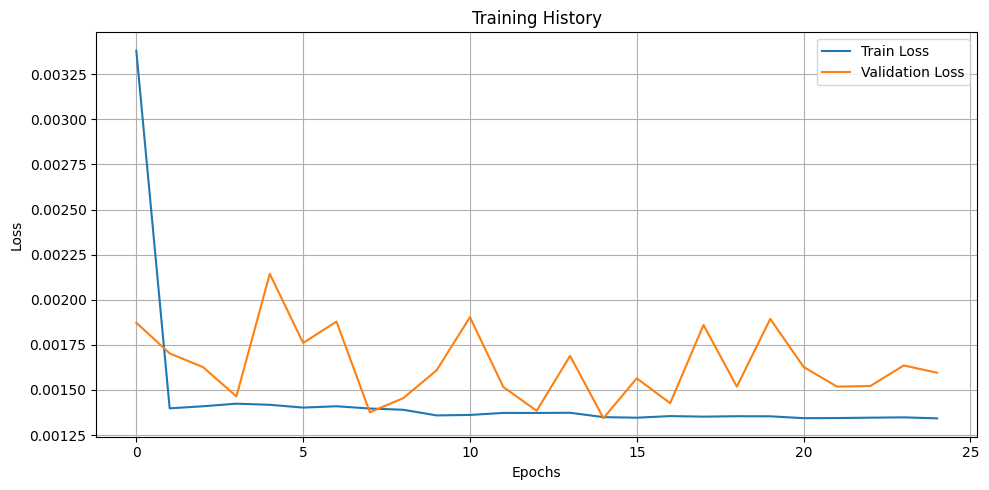

169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
  Metric       Value
0    MSE    0.000934
1    MAE    0.024074
2   RMSE    0.030557
3     R2    0.627565
4   MAPE    4.364720
5  SMAPE    4.310954
6    SAE  129.641100


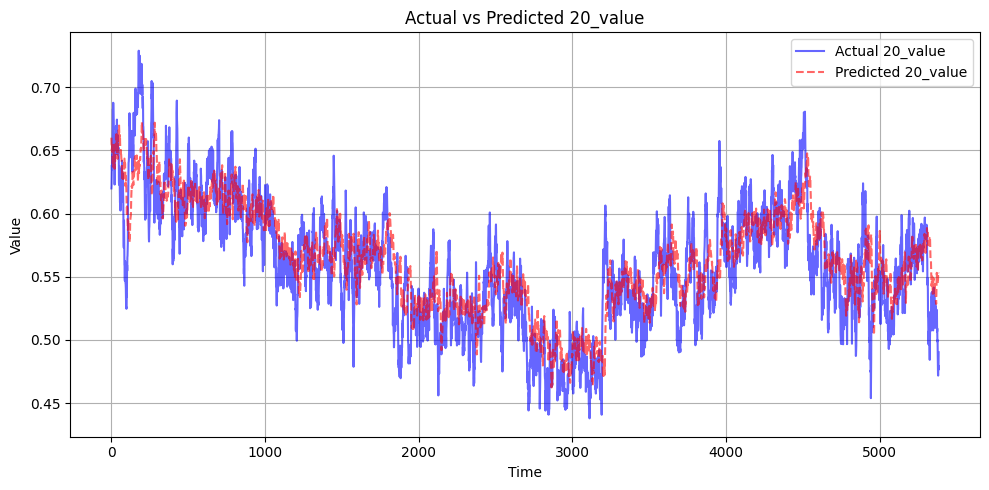

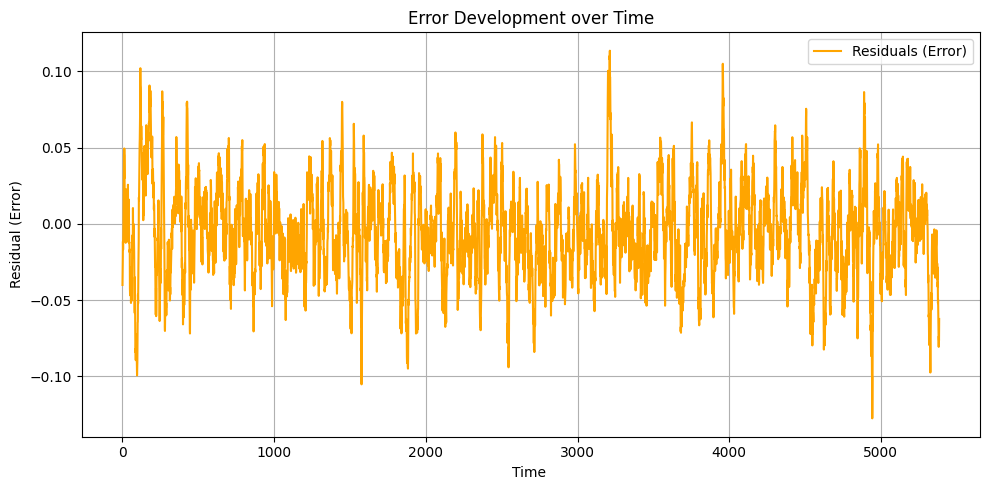

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Registered model 'Direct_Refiner_Model_avg_lstm_simple' already exists. Creating a new version of this model...
Created version '2' of model 'Direct_Refiner_Model_avg_lstm_simple'.


In [35]:
dir_model_av = mlflow.keras.load_model("models:/Direct_LSTM_Model_average/3") 
dir_model_av.summary()
run_direct_refiner_experiment(build_refinement_lstm_model_simple,
                              dir_model_av,
                              'avg_lstm_simple',
                              'ref_avg_lstm_simple',
                              X_train_dir=X_train_dir,
                              X_test_dir=X_test_dir,
                              X_val_dir=X_val_dir,
                              y_test_dir=y_test_dir,
                              y_train_dir=y_train_dir,
                              y_val_dir=y_val_dir,
                              output_steps=20,
                              units=64)

Hybrid: Direct Average + Refine LSTM Average 

516/516 ━━━━━━━━━━━━━━━━━━━━ 19s 35ms/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step
169/169 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step
(20, 1)


Model: "Refiner_LSTM_Average"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ refinement_input (InputLayer)   │ (None, 20, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_44 (LSTM)                  │ (None, 20, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_45 (Dropout)            │ (None, 20, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_45 (LSTM)                  │ (None, 20, 32)         │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_46 (Dropout)            │ (None, 20, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_46 (LSTM)                  │ (None, 16)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_47 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,465 (126.82 KB)

 Trainable params: 32,465 (126.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0206 - mae: 0.0968 - mse: 0.0206
Epoch 1: val_loss improved from inf to 0.00447, saving model to models/saved/Direct_Refiner_Model_avg_lstm_avg.keras
516/516 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - loss: 0.0206 - mae: 0.0967 - mse: 0.0206 - val_loss: 0.0045 - val_mae: 0.0580 - val_mse: 0.0045 - learning_rate: 0.0010
Epoch 2/30
515/516 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0046 - mae: 0.0536 - mse: 0.0046
Epoch 2: val_loss improved from 0.00447 to 0.00173, saving model to models/saved/Direct_Refiner_Model_avg_lstm_avg.keras
516/516 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - loss: 0.0046 - mae: 0.0536 - mse: 0.0046 - val_loss: 0.0017 - val_mae: 0.0342 - val_mse: 0.0017 - learning_rate: 0.0010
Epoch 3/30
513/516 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0034 - mae: 0.0465 - mse: 0.0034
Epoch 3: val_loss did not improve from 0.00173
516/516 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - loss: 0.0034 - mae: 0.0464 - mse: 0.0034 - val_loss: 0

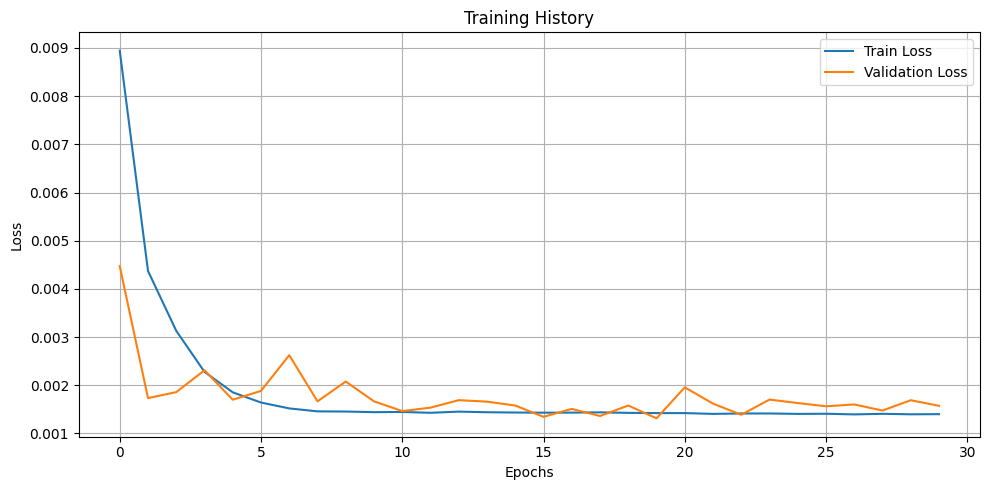

169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
  Metric       Value
0    MSE    0.001011
1    MAE    0.025225
2   RMSE    0.031797
3     R2    0.596727
4   MAPE    4.599685
5  SMAPE    4.510796
6    SAE  135.835938


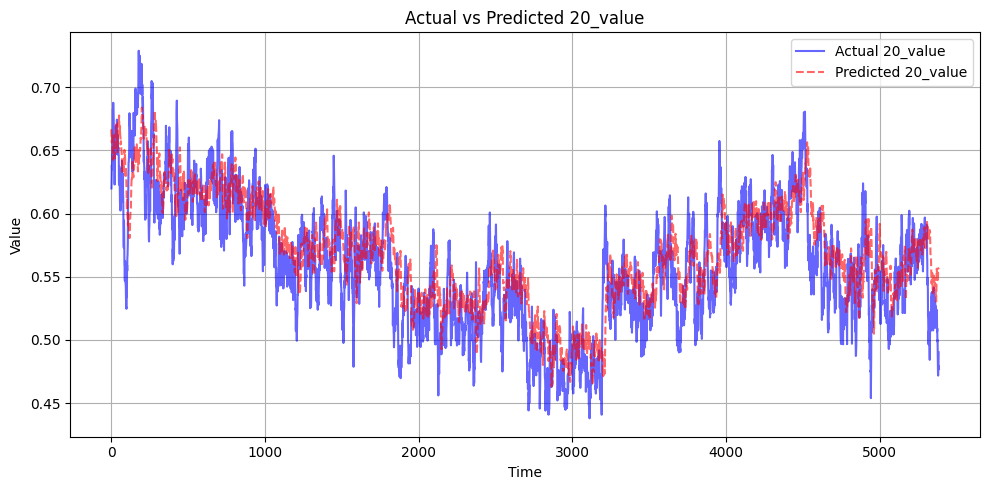

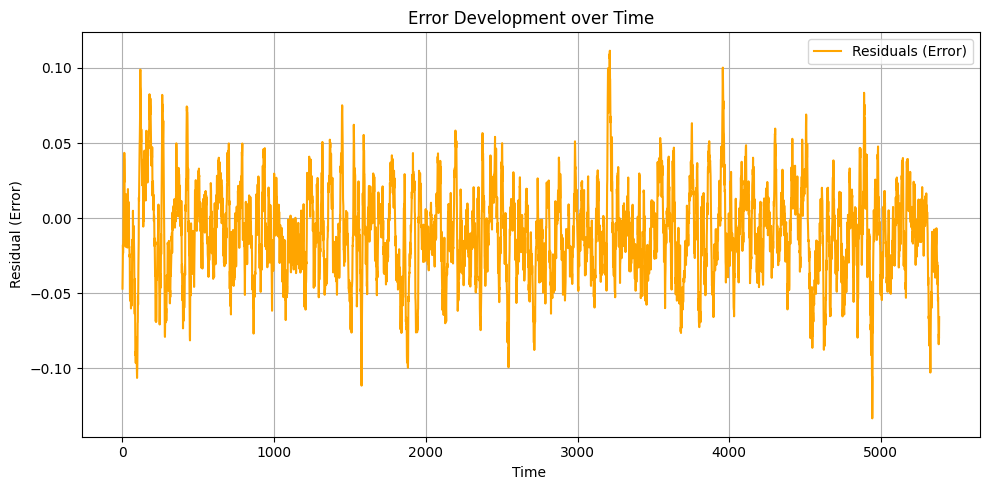

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Registered model 'Direct_Refiner_Model_avg_lstm_avg' already exists. Creating a new version of this model...
Created version '3' of model 'Direct_Refiner_Model_avg_lstm_avg'.


In [37]:
dir_model = mlflow.keras.load_model("models:/Direct_LSTM_Model_average/3") 
run_direct_refiner_experiment(build_average_refinement_lstm,
                              dir_model,
                              'avg_lstm_avg',
                              'ref_avg_lstm_avg',
                              X_train_dir=X_train_dir,
                              X_test_dir=X_test_dir,
                              X_val_dir=X_val_dir,
                              y_test_dir=y_test_dir,
                              y_train_dir=y_train_dir,
                              y_val_dir=y_val_dir,
                              output_steps=20,
                              units=64)